........# <h1 style="color:red; font-family: Arial;">Project: Movie Recommendation </h1>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings('ignore')

# 1 - Business Problem

<h3 style="color:blue; font-family: Arial;">Recommend movie on basis of Genre </h3>

# 2 - Data collection

In [2]:
df1 = pd.read_csv("./imdb_10000_movies.csv")
df2 = pd.read_csv("./imdb_10000_movies1.csv")

In [3]:
df = pd.concat([df1,df2])
df.head()

,Name of movie,YEAR,RATES,METASCORE,gross_collection,Votes,Watch Time,Genre,Certificate,Description,Director,Stars
0,The Shawshank Redemption,1994,9.3,82,"28,341,469",2806836,142,Drama,A,"Over the course of several years, two convicts...",\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,9.2,100,"134,966,411",1955954,175,"Crime, Drama",A,"Don Vito Corleone, head of a mafia family, dec...",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,Ramayana: The Legend of Prince Rama,1993,9.2,NAN,13031,13031,135,"Animation, Action, Adventure",U,An anime adaptation of the Hindu epic the Rama...,"Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,Hababam Sinifi,1975,9.2,NAN,42248,42248,87,"Comedy, Drama",NaN,"Lazy, uneducated students share a very close b...",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,The Dark Knight,2008,9.0,84,"534,858,444",2788568,152,"Action, Crime, Drama",UA,When the menace known as the Joker wreaks havo...,\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."


In [4]:
df.describe()

,RATES,Votes,Watch Time
count,20000.000000,2.000000e+04,20000.000000
mean,6.625255,7.339473e+04,117.734700
std,0.893596,1.369026e+05,24.825343
min,1.200000,1.000000e+04,45.000000
25%,6.000000,1.762225e+04,100.000000
50%,6.700000,3.022100e+04,112.000000
75%,7.200000,6.203100e+04,132.000000
max,9.300000,2.806836e+06,439.000000


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Name of movie,20000,9803,Fukrey 3,175
YEAR,20000,196,2023,8785
METASCORE,20000,94,NAN,5489
gross_collection,20000,10720,15942,176
Genre,20000,427,"Action, Adventure, Drama",868
Certificate,16826,30,R,4256
Description,20000,10103,Hadley and Oliver begin to fall for each other...,175
Director,20000,4212,\nScott Waugh,350
Stars,19995,10055,"Anna Castillo, Tamar Novas, Tony Corvillo, Mar...",175


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of movie     20000 non-null  object 
 1   YEAR              20000 non-null  object 
 2   RATES             20000 non-null  float64
 3   METASCORE         20000 non-null  object 
 4   gross_collection  20000 non-null  object 
 5   Votes             20000 non-null  int64  
 6   Watch Time        20000 non-null  int64  
 7   Genre             20000 non-null  object 
 8   Certificate       16826 non-null  object 
 9   Description       20000 non-null  object 
 10  Director          20000 non-null  object 
 11  Stars             19995 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.0+ MB


_<span style="color:blue; font-family: Arial;">There are features that are numeric but representig data type as object</span>_


<Axes: >

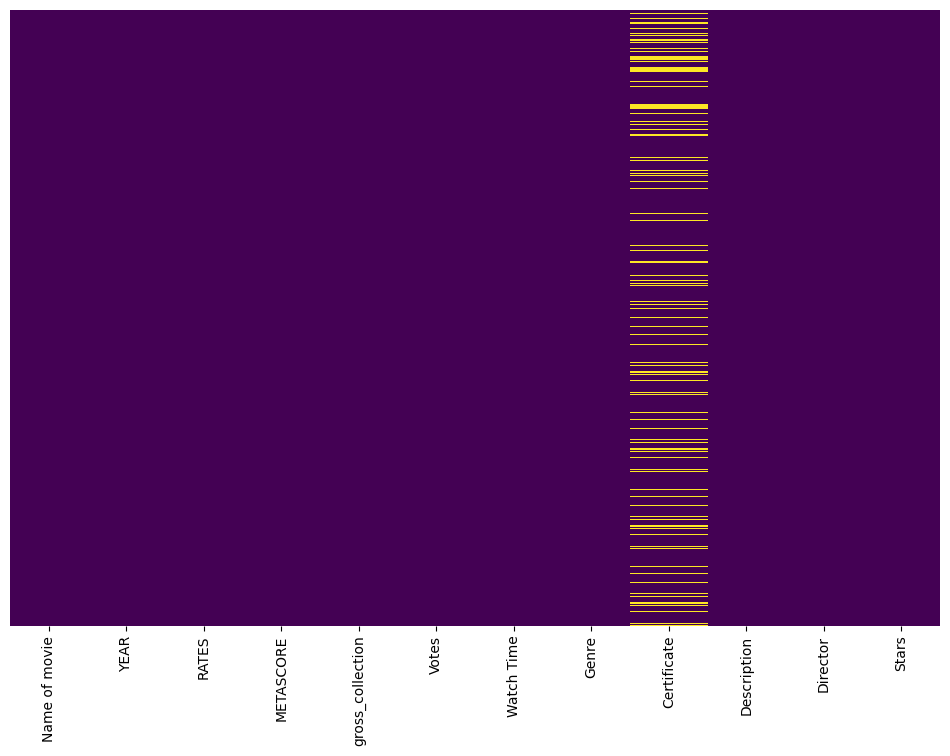

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#calculating percentage of missing values for each columns
for i,j in zip(df.isna().sum().index,df.isna().sum()):
    print(f'Missing values in {i}:{(j/len(df))*100}%')

Missing values in Name of movie:0.0%
Missing values in YEAR:0.0%
Missing values in RATES:0.0%
Missing values in METASCORE:0.0%
Missing values in gross_collection:0.0%
Missing values in Votes:0.0%
Missing values in Watch Time:0.0%
Missing values in Genre:0.0%
Missing values in Certificate:15.870000000000001%
Missing values in Description:0.0%
Missing values in Director:0.0%
Missing values in Stars:0.025%


In [9]:
df.dropna(subset=['Stars'],inplace=True)

In [10]:
df.shape

(19995, 12)

In [11]:
df.isnull().sum()

Name of movie          0
YEAR                   0
RATES                  0
METASCORE              0
gross_collection       0
Votes                  0
Watch Time             0
Genre                  0
Certificate         3169
Description            0
Director               0
Stars                  0
dtype: int64

# 2 - Data Cleaning

In [12]:
def clean_year(txt):
    if isinstance(txt,int):
        txt = str(txt)
    txt = re.sub(r'[^\d+]','',txt)
    return int(txt)

In [13]:
df['YEAR'] = df['YEAR'].apply(clean_year)

In [14]:
def convert_int(input):
    try:
        input = input.replace(',','')
        input = int(input)
        return input
    except Exception as e:
        return False

In [15]:
df['gross_collection'] = df['gross_collection'].apply(convert_int)

In [16]:
df['METASCORE'] = pd.to_numeric(df['METASCORE'], errors='coerce')

In [17]:
mean_meta = df['METASCORE'].mean()
df['METASCORE'].fillna(mean_meta, inplace=True)

# 4 - check for outliers

In [18]:
def detect_outliers_RATES(df):
    outliers = df[(df['RATES'] < 0) | (df['RATES'] > 10)]['RATES']
    if not outliers.empty:
        print("Outliers in RATES column:")
        print(outliers)
    else:
        print("No outliers found in RATES column.")

detect_outliers_RATES(df)

No outliers found in RATES column.


In [19]:
def detect_outliers_metascore(df):
    outliers = df[(df['METASCORE'] < 0) | (df['METASCORE'] > 100)]['METASCORE']
    if not outliers.empty:
        print("Outliers in METASCORE column:")
        print(outliers)
    else:
        print("No outliers found in METASCORE column.")

detect_outliers_metascore(df)

No outliers found in METASCORE column.


In [20]:
def detect_outliers_gross_collection(df):
    outliers = df[df['gross_collection'] < 0]['gross_collection']
    if not outliers.empty:
        print("Outliers in gross_collection column:")
        print(outliers)
    else:
        print("No outliers found in gross_collection column.")

detect_outliers_gross_collection(df)

No outliers found in gross_collection column.


In [21]:
def detect_outliers_votes(df):
    outliers = df[df['Votes'] < 0]['Votes']
    if not outliers.empty:
        print("Outliers in Votes column:")
        print(outliers)
    else:
        print("No outliers found in Votes column.")

detect_outliers_votes(df)

No outliers found in Votes column.


In [22]:
#renaming column name
df.rename(columns={'Watch Time':'Screening'},inplace=True)

In [23]:
def detect_outliers_Screening(df):
    outliers = df[df['Screening'] < 0]['Screening']
    if not outliers.empty:
        print("Outliers in Screening column:")
        print(outliers)
    else:
        print("No outliers found in Screening column.")

detect_outliers_Screening(df)

No outliers found in Screening column.


# 5 - check for correlation

In [24]:
 df.corr( numeric_only= True)

,YEAR,RATES,METASCORE,gross_collection,Votes,Screening
YEAR,1.000000,-0.226229,-0.173743,-0.133562,-0.049377,0.204134
RATES,-0.226229,1.000000,0.533511,0.078947,0.283783,0.263880
METASCORE,-0.173743,0.533511,1.000000,0.050589,0.280637,0.179768
gross_collection,-0.133562,0.078947,0.050589,1.000000,0.587172,-0.007895
Votes,-0.049377,0.283783,0.280637,0.587172,1.000000,0.163929
Screening,0.204134,0.263880,0.179768,-0.007895,0.163929,1.000000


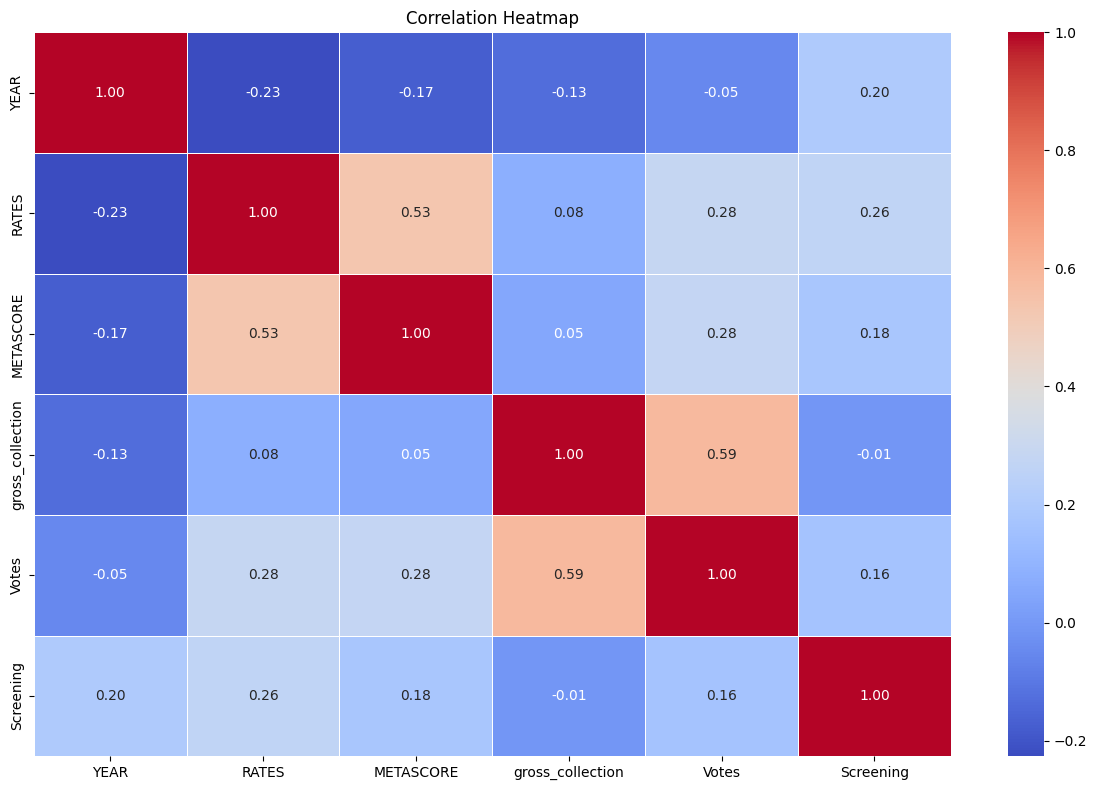

In [25]:
sns.heatmap(df.corr( numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


plt.title('Correlation Heatmap')
plt.tight_layout()


plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">1) "RATES" and "METASCORE" variables have a moderate positive correlation, suggests that movies with higher ratings tend to have higher Metascores</h3>

<h3 style="color:blue; font-family: Arial;">2) "Votes" shows a relatively strong positive correlation with both "RATES" and "METASCORE". This implies that popular movies with higher viewer engagement tend to have higher ratings as well.</h3>

<h3 style="color:blue; font-family: Arial;">3) "watch time" have a moderate positive correlation with "RATES" and "Votes". This might suggest that movies with more screenings tend to have higher ratings and more significant viewer engagement.</h3>

# 6 - Visualization

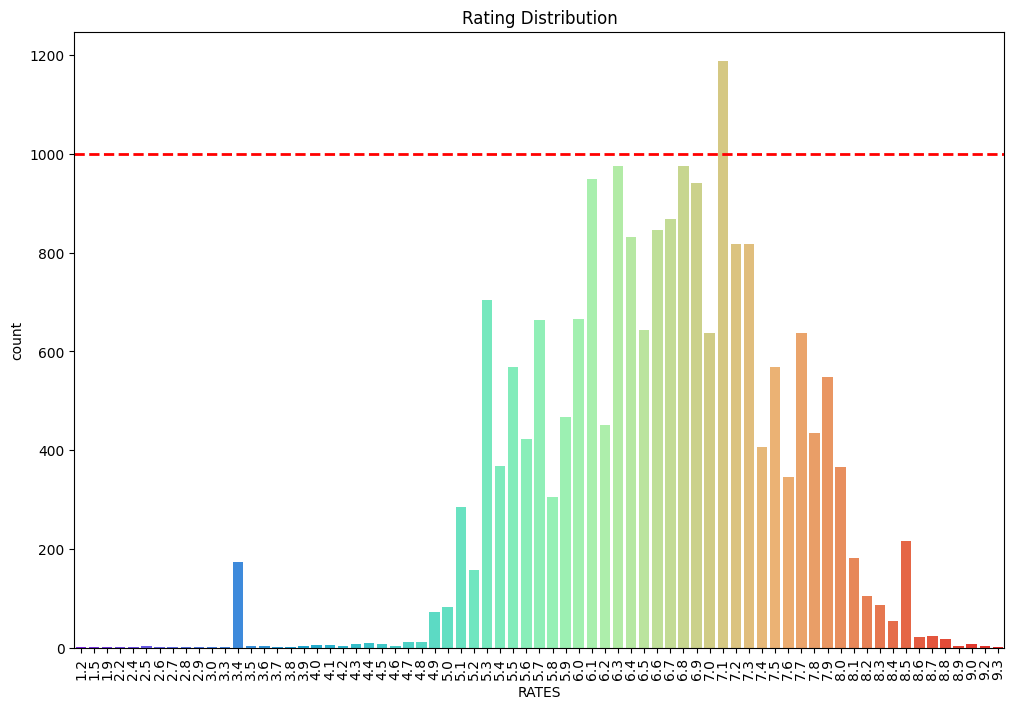

In [26]:
sns.countplot(df,x='RATES',palette='rainbow')
plt.xticks(rotation=90)
plt.title('Rating Distribution')
plt.axhline(y=1000, color='r', linestyle='--', linewidth=2)
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Most of the people prefer to rate 7.1</h3>
<h3 style="color:blue; font-family: Arial;">Mostly the ratings are between 6 to 7</h3>


In [27]:
bin_size = 3
bin_edges = list(range(min(df['YEAR']), 2024, bin_size))

# Bin the years and calculate the average rating for each bin
df['year_bin'] = pd.cut(df['YEAR'], bins=bin_edges)


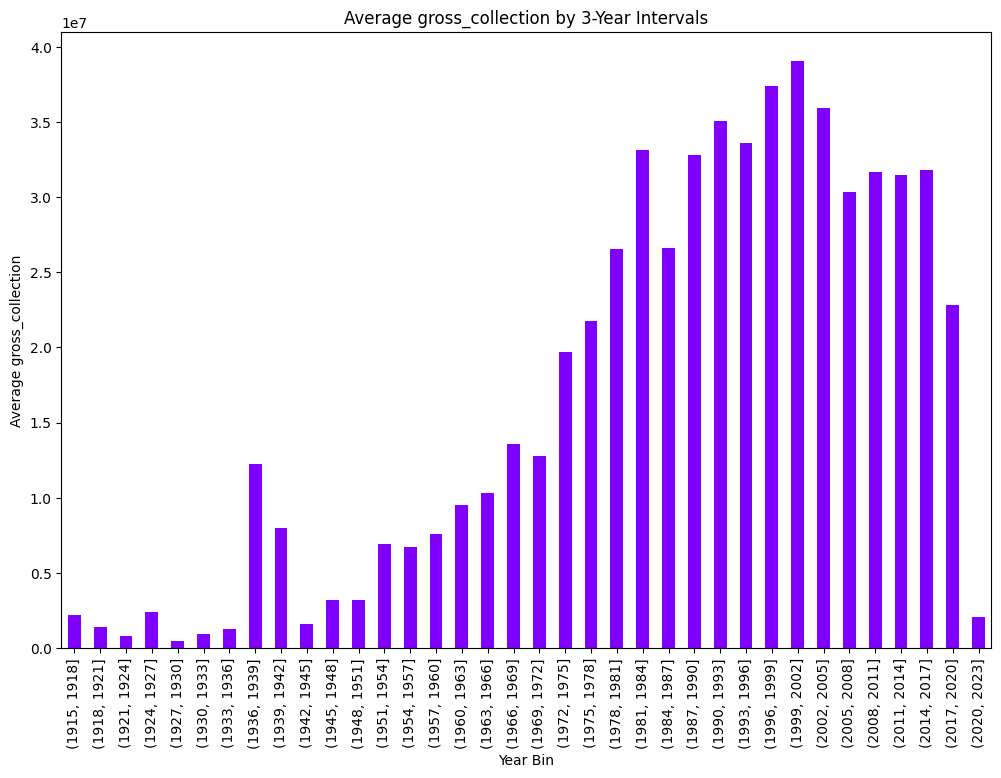

In [28]:
gross_collection = df.groupby('year_bin')['gross_collection'].mean()
gross_collection.plot(kind='bar', colormap='rainbow')
plt.title('Average gross_collection by 3-Year Intervals')
plt.xlabel('Year Bin')
plt.ylabel('Average gross_collection')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Higher gross collection has been seen between 1999 to 2002</h3>

<h3 style="color:blue; font-family: Arial;">Due to the impact of the COVID-19 pandemic, there has been a significant decline in gross collections over the past three years.</h3>

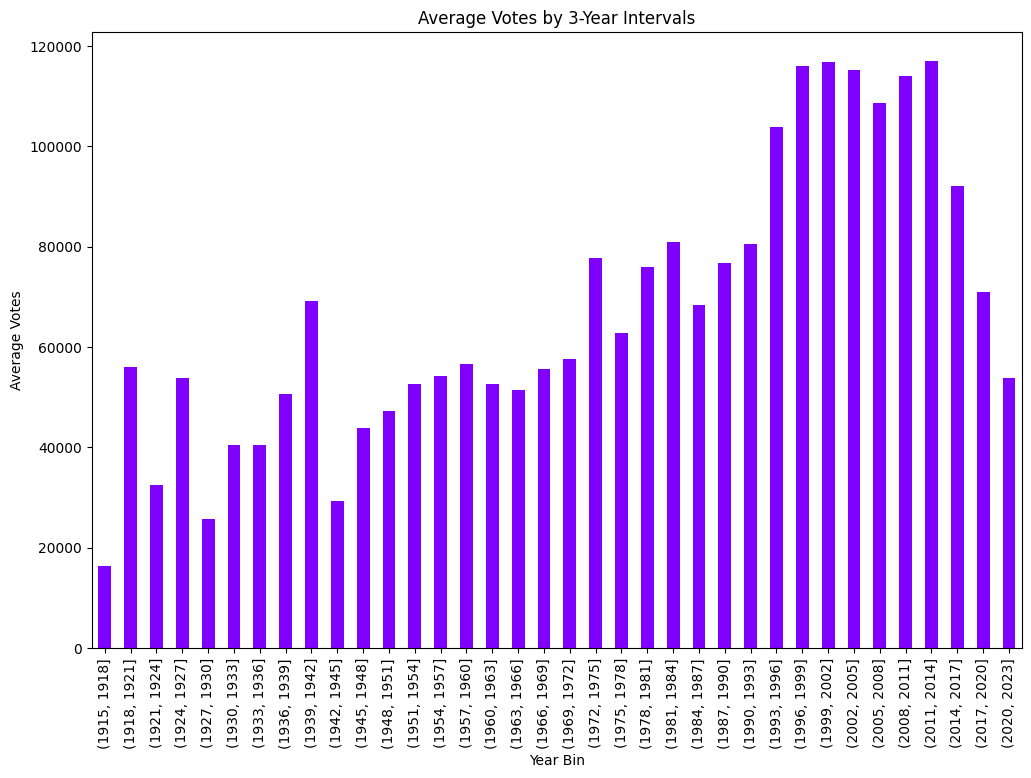

In [29]:
avg_Votes = df.groupby('year_bin')['Votes'].mean()
avg_Votes.plot(kind='bar',colormap='rainbow')
plt.title('Average Votes by 3-Year Intervals')
plt.xlabel('Year Bin')
plt.ylabel('Average Votes')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">The period from 1996 to 2002 saw a significant surge in the number of votes cast.</h3>

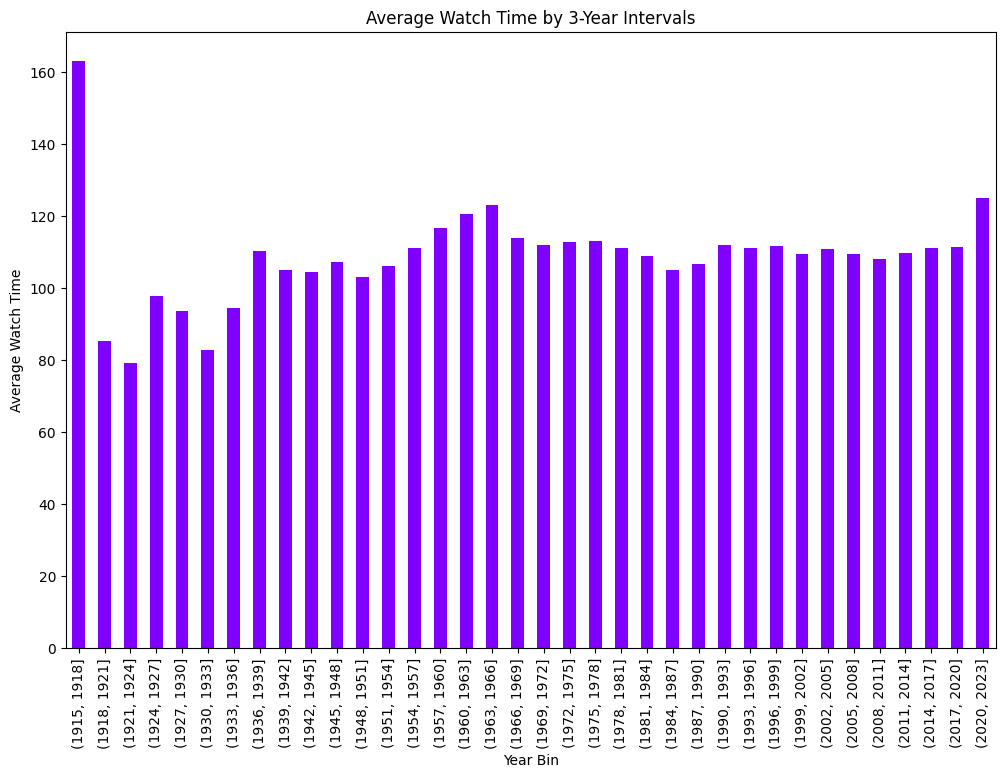

In [30]:
avg_Watch = df.groupby('year_bin')['Screening'].mean()
avg_Watch.plot(kind='bar',colormap='rainbow')
plt.title('Average Watch Time by 3-Year Intervals')
plt.xlabel('Year Bin')
plt.ylabel('Average Watch Time')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Movies between 1915 to 1918 contains higher watch time</h3>

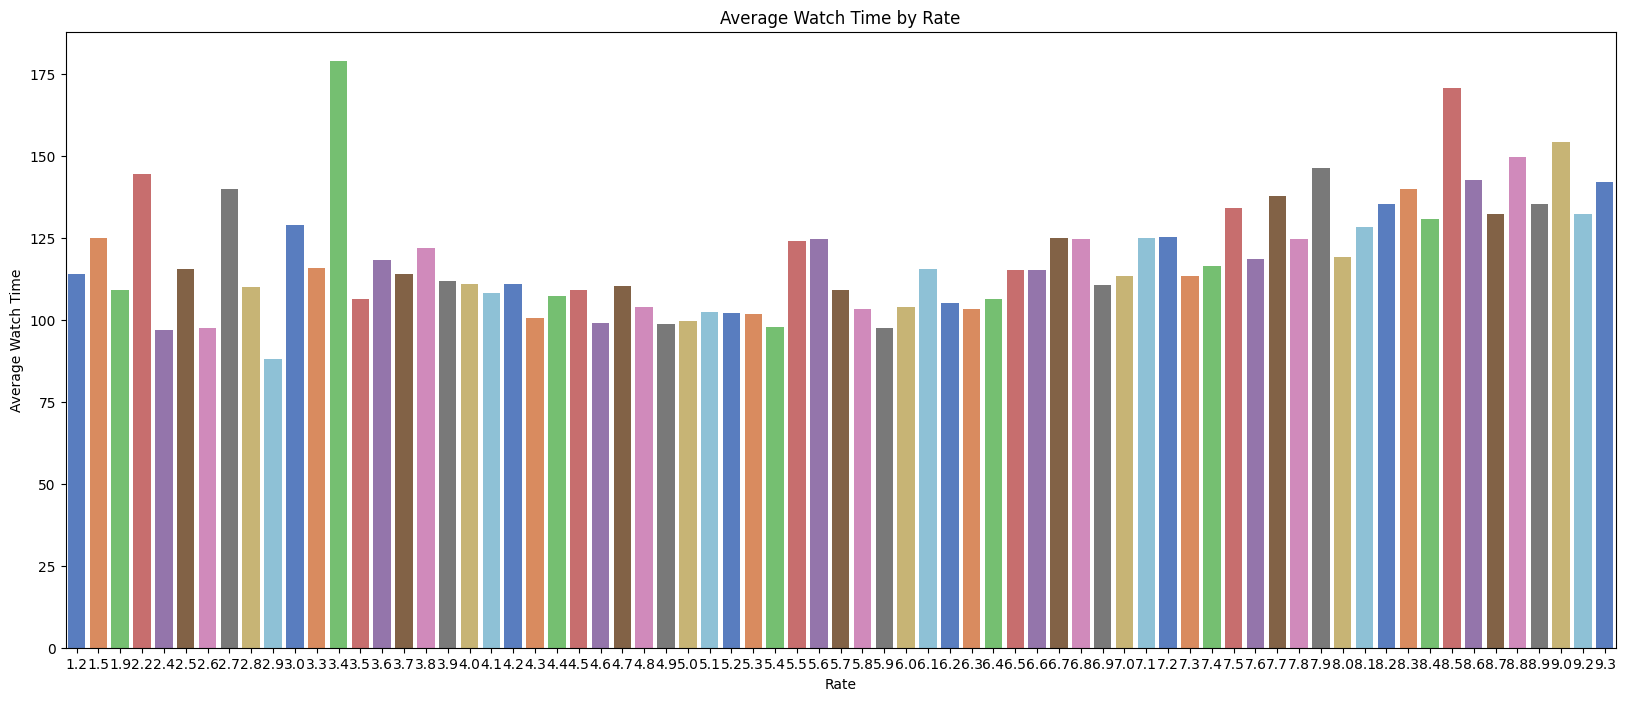

In [31]:
average_watch_time = df.groupby('RATES')['Screening'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=average_watch_time.index, y=average_watch_time.values, palette='muted')
plt.title('Average Watch Time by Rate')
plt.xlabel('Rate')
plt.ylabel('Average Watch Time')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Movies which has watch time 2hrs or above are likely to have good ratings</h3>

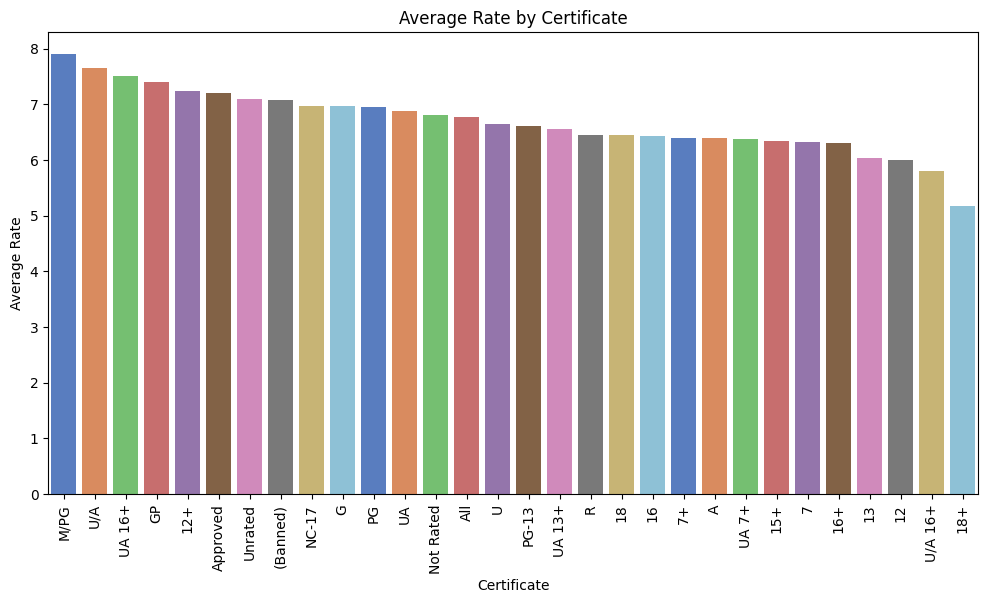

In [32]:
average_rate_by_certificate = df.groupby('Certificate')['RATES'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_rate_by_certificate.index, y=average_rate_by_certificate.values, palette='muted')
plt.title('Average Rate by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Average Rate')
plt.xticks(rotation=90)
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">
Movies with a "mature audiences" or "parental guidance suggested" (M/PG) rating tend to have higher viewer approval</h3>

# Copy data

In [33]:
sub = df.copy(deep=True)
sub = sub[['Name of movie','YEAR','RATES','Genre','Director','Stars','Description']]

In [34]:
sub.head()

,Name of movie,YEAR,RATES,Genre,Director,Stars,Description
0,The Shawshank Redemption,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts..."
1,The Godfather,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...
3,Hababam Sinifi,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b..."
4,The Dark Knight,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...


In [35]:
sub.shape[0] == df.shape[0]

True

In [36]:
sub.rename(columns={'Name of movie':'movie','YEAR':'year','RATES':'rating','Genre':'genre','Director':'director','Stars':'stars','Description':'description'},inplace=True)

In [37]:
sub.head()

,movie,year,rating,genre,director,stars,description
0,The Shawshank Redemption,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts..."
1,The Godfather,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...
3,Hababam Sinifi,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b..."
4,The Dark Knight,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...


In [38]:
sub['movie'].value_counts()

A Million Miles Away    175
Oppenheimer             175
Satyaprem Ki Katha      175
Bawaal                  175
Jawan                   175
                       ... 
Kinsey                    1
Megan Leavey              1
Nowhere Boy               1
American Me               1
The Last Boy              1
Name: movie, Length: 9800, dtype: int64

In [39]:
for i in range(len(sub)):
    sub.iloc[i,0] = sub.iloc[i,0] + " " + str(sub.iloc[i,1])
sub.head()

,movie,year,rating,genre,director,stars,description
0,The Shawshank Redemption 1994,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts..."
1,The Godfather 1972,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama 1993,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...
3,Hababam Sinifi 1975,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b..."
4,The Dark Knight 2008,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...


In [40]:
sub.shape

(19995, 7)

In [41]:
sub.drop_duplicates(subset=['movie'],keep='last',inplace=True)
sub.head()

,movie,year,rating,genre,director,stars,description
0,The Shawshank Redemption 1994,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts..."
1,The Godfather 1972,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama 1993,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...
3,Hababam Sinifi 1975,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b..."
4,The Dark Knight 2008,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...


In [42]:
sub.shape

(10103, 7)

In [43]:
sub['movie'].value_counts()

The Shawshank Redemption 1994    1
Larry Crowne 2011                1
Tourist Trap 1979                1
Fletch Lives 1989                1
Harry and the Hendersons 1987    1
                                ..
Goodbye Bafana 2007              1
Raajneeti 2010                   1
Shootout at Lokhandwala 2007     1
El aura 2005                     1
Priyotoma 2023                   1
Name: movie, Length: 10103, dtype: int64

In [44]:
sub.isna().any()

movie          False
year           False
rating         False
genre          False
director       False
stars          False
description    False
dtype: bool

In [45]:
def clean_movie_name(txt):
    txt = txt.lower()
    txt = re.sub(r"[^a-zA-Z0-9\s]+","",txt)
    txt = re.sub(r'\s+', ' ', txt)
    return txt

In [46]:
sub['clean_movie'] = sub['movie'].apply(clean_movie_name)

In [47]:
sub.head()

,movie,year,rating,genre,director,stars,description,clean_movie
0,The Shawshank Redemption 1994,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts...",the shawshank redemption 1994
1,The Godfather 1972,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec...",the godfather 1972
2,Ramayana: The Legend of Prince Rama 1993,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...,ramayana the legend of prince rama 1993
3,Hababam Sinifi 1975,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b...",hababam sinifi 1975
4,The Dark Knight 2008,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,the dark knight 2008


In [48]:
sub.reset_index(inplace=True,drop=True)

In [49]:
movie_ratings_dict = {}
for i in sub.index:
    movie_ratings_dict[sub.loc[i,'clean_movie']] = sub.loc[i,'rating']


def sort_by_rating(recommendation,movie_rating_dict):
    tmp = {
        'Movie': recommendation,
        'Rating': [movie_rating_dict[i] for i in recommendation]
    }
    tmp_df = pd.DataFrame(tmp)
    tmp_df.sort_values('Rating',ascending=False,inplace=True)
    return tmp_df['Movie'].to_numpy()

# Recommendation System using genre

In [50]:
gen = set()
for i in sub['genre']:
    for j in i.split(','):
        j = re.sub(r'\s+', '', j)
        gen.add(j)
gen

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [51]:
def get_geners(txt):
    txt = txt.lower()
    txt = re.sub(r'\s+', '', txt)
    txt = txt.split(',')
    return txt

In [52]:
sub['clean_genre'] = sub['genre'].apply(get_geners)

In [53]:
for i in gen:
    i = i.lower()
    sub[i] = 0

In [54]:
sub.reset_index(inplace=True)
for i in range(len(sub)):
    genres = sub.loc[i,'clean_genre']
    for j in genres:
        sub.loc[i,j] = 1
sub.head()

,index,movie,year,rating,genre,director,stars,description,clean_movie,clean_genre,...,mystery,adventure,film-noir,war,music,animation,sci-fi,thriller,history,drama
0,0,The Shawshank Redemption 1994,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts...",the shawshank redemption 1994,[drama],...,0,0,0,0,0,0,0,0,0,1
1,1,The Godfather 1972,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec...",the godfather 1972,"[crime, drama]",...,0,0,0,0,0,0,0,0,0,1
2,2,Ramayana: The Legend of Prince Rama 1993,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...,ramayana the legend of prince rama 1993,"[animation, action, adventure]",...,0,1,0,0,0,1,0,0,0,0
3,3,Hababam Sinifi 1975,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b...",hababam sinifi 1975,"[comedy, drama]",...,0,0,0,0,0,0,0,0,0,1
4,4,The Dark Knight 2008,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,the dark knight 2008,"[action, crime, drama]",...,0,0,0,0,0,0,0,0,0,1


In [55]:
from sklearn.metrics import pairwise_distances

In [56]:
gen = [x.lower() for x in gen]

In [57]:
gen_df = sub[['clean_movie','year','rating',*gen]]
gen_df.head()

,clean_movie,year,rating,biography,sport,musical,horror,family,fantasy,crime,...,mystery,adventure,film-noir,war,music,animation,sci-fi,thriller,history,drama
0,the shawshank redemption 1994,1994,9.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,the godfather 1972,1972,9.2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,ramayana the legend of prince rama 1993,1993,9.2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,hababam sinifi 1975,1975,9.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,the dark knight 2008,2008,9.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [58]:
#pivot table for genre
gen_pivot = gen_df[[*gen]]
gen_pivot.index = gen_df['clean_movie']
gen_pivot

,biography,sport,musical,horror,family,fantasy,crime,action,romance,western,...,mystery,adventure,film-noir,war,music,animation,sci-fi,thriller,history,drama
clean_movie,,,,,,,,,,,,,,,,,,,,,
the shawshank redemption 1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
the godfather 1972,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ramayana the legend of prince rama 1993,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
hababam sinifi 1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
the dark knight 2008,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sound of freedom 2023,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
satyaprem ki katha 2023,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
lust stories 2 2023,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# cosine similarrity between movies 
# creat a dummy user 
dummy_user = pd.DataFrame({'western':[0],'horror':[0],'thriller':[0],'crime':[1],'music':[0],'mystery':[0],'biography':[0],'adventure':[0],
                           'romance':[0],'action':[0],'animation':[0],'sci-fi':[0],'comedy':[0],'sport':[0],'history':[0],'fantasy':[0],'film-noir':[0],
                           'drama':[1],'war':[1],'family':[0],'musical':[0]}) # dummy user like war , drama and crime genre
temp = pd.concat([gen_pivot,dummy_user],ignore_index=True)
cosine_simm = 1 - pairwise_distances(temp,metric='cosine')
cosine_simm

array([[1.        , 0.70710678, 0.        , ..., 0.57735027, 0.57735027,
        0.57735027],
       [0.70710678, 1.        , 0.        , ..., 0.40824829, 0.40824829,
        0.81649658],
       [0.        , 0.        , 1.        , ..., 0.        , 0.33333333,
        0.        ],
       ...,
       [0.57735027, 0.40824829, 0.        , ..., 1.        , 0.66666667,
        0.33333333],
       [0.57735027, 0.40824829, 0.33333333, ..., 0.66666667, 1.        ,
        0.33333333],
       [0.57735027, 0.81649658, 0.        , ..., 0.33333333, 0.33333333,
        1.        ]])

In [60]:
sim_df = pd.DataFrame(cosine_simm)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,1.000000,0.707107,0.000000,0.707107,0.577350,0.577350,0.577350,0.707107,0.707107,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.707107,0.577350,0.577350,0.577350
1,0.707107,1.000000,0.000000,0.500000,0.816497,0.408248,0.408248,1.000000,1.000000,0.408248,...,0.000000,0.000000,0.408248,0.000000,0.816497,0.408248,0.500000,0.408248,0.408248,0.816497
2,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,...,0.408248,0.333333,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
3,0.707107,0.500000,0.000000,1.000000,0.408248,0.408248,0.408248,0.500000,0.500000,0.000000,...,0.500000,0.408248,0.408248,0.408248,0.408248,0.816497,0.500000,0.816497,0.408248,0.408248
4,0.577350,0.816497,0.333333,0.408248,1.000000,0.333333,0.666667,0.816497,0.816497,0.333333,...,0.408248,0.000000,0.666667,0.333333,0.666667,0.333333,0.408248,0.333333,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,0.577350,0.408248,0.000000,0.816497,0.333333,0.333333,0.333333,0.408248,0.408248,0.000000,...,0.408248,0.333333,0.333333,0.333333,0.333333,1.000000,0.408248,0.666667,0.333333,0.333333
10100,0.707107,0.500000,0.000000,0.500000,0.408248,0.408248,0.408248,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,1.000000,0.816497,0.816497,0.408248
10101,0.577350,0.408248,0.000000,0.816497,0.333333,0.333333,0.333333,0.408248,0.408248,0.000000,...,0.408248,0.333333,0.333333,0.333333,0.333333,0.666667,0.816497,1.000000,0.666667,0.333333
10102,0.577350,0.408248,0.333333,0.408248,0.666667,0.333333,0.666667,0.408248,0.408248,0.000000,...,0.408248,0.000000,0.333333,0.333333,0.333333,0.333333,0.816497,0.666667,1.000000,0.333333


In [61]:
#similarities between movies and dummy user
sim_df.index = [*gen_pivot.index,'user']
sim_df.columns = [*gen_pivot.index,'user']
sim_df

,the shawshank redemption 1994,the godfather 1972,ramayana the legend of prince rama 1993,hababam sinifi 1975,the dark knight 2008,schindlers list 1993,the lord of the rings the return of the king 2003,12 angry men 1957,the godfather part ii 1974,aynabaji 2016,...,checkmate 2023,barbie 2023,the outlaws 2023,hidden strike 2023,sound of freedom 2023,satyaprem ki katha 2023,lust stories 2 2023,carry on jatta 3 2023,priyotoma 2023,user
the shawshank redemption 1994,1.000000,0.707107,0.000000,0.707107,0.577350,0.577350,0.577350,0.707107,0.707107,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.707107,0.577350,0.577350,0.577350
the godfather 1972,0.707107,1.000000,0.000000,0.500000,0.816497,0.408248,0.408248,1.000000,1.000000,0.408248,...,0.000000,0.000000,0.408248,0.000000,0.816497,0.408248,0.500000,0.408248,0.408248,0.816497
ramayana the legend of prince rama 1993,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,...,0.408248,0.333333,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
hababam sinifi 1975,0.707107,0.500000,0.000000,1.000000,0.408248,0.408248,0.408248,0.500000,0.500000,0.000000,...,0.500000,0.408248,0.408248,0.408248,0.408248,0.816497,0.500000,0.816497,0.408248,0.408248
the dark knight 2008,0.577350,0.816497,0.333333,0.408248,1.000000,0.333333,0.666667,0.816497,0.816497,0.333333,...,0.408248,0.000000,0.666667,0.333333,0.666667,0.333333,0.408248,0.333333,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0.577350,0.408248,0.000000,0.816497,0.333333,0.333333,0.333333,0.408248,0.408248,0.000000,...,0.408248,0.333333,0.333333,0.333333,0.333333,1.000000,0.408248,0.666667,0.333333,0.333333
lust stories 2 2023,0.707107,0.500000,0.000000,0.500000,0.408248,0.408248,0.408248,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,1.000000,0.816497,0.816497,0.408248
carry on jatta 3 2023,0.577350,0.408248,0.000000,0.816497,0.333333,0.333333,0.333333,0.408248,0.408248,0.000000,...,0.408248,0.333333,0.333333,0.333333,0.333333,0.666667,0.816497,1.000000,0.666667,0.333333
priyotoma 2023,0.577350,0.408248,0.333333,0.408248,0.666667,0.333333,0.666667,0.408248,0.408248,0.000000,...,0.408248,0.000000,0.333333,0.333333,0.333333,0.333333,0.816497,0.666667,1.000000,0.333333


In [62]:
np.fill_diagonal(sim_df.values,0)
sim_df

,the shawshank redemption 1994,the godfather 1972,ramayana the legend of prince rama 1993,hababam sinifi 1975,the dark knight 2008,schindlers list 1993,the lord of the rings the return of the king 2003,12 angry men 1957,the godfather part ii 1974,aynabaji 2016,...,checkmate 2023,barbie 2023,the outlaws 2023,hidden strike 2023,sound of freedom 2023,satyaprem ki katha 2023,lust stories 2 2023,carry on jatta 3 2023,priyotoma 2023,user
the shawshank redemption 1994,0.000000,0.707107,0.000000,0.707107,0.577350,0.577350,0.577350,0.707107,0.707107,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.577350,0.577350,0.707107,0.577350,0.577350,0.577350
the godfather 1972,0.707107,0.000000,0.000000,0.500000,0.816497,0.408248,0.408248,1.000000,1.000000,0.408248,...,0.000000,0.000000,0.408248,0.000000,0.816497,0.408248,0.500000,0.408248,0.408248,0.816497
ramayana the legend of prince rama 1993,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,...,0.408248,0.333333,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
hababam sinifi 1975,0.707107,0.500000,0.000000,0.000000,0.408248,0.408248,0.408248,0.500000,0.500000,0.000000,...,0.500000,0.408248,0.408248,0.408248,0.408248,0.816497,0.500000,0.816497,0.408248,0.408248
the dark knight 2008,0.577350,0.816497,0.333333,0.408248,0.000000,0.333333,0.666667,0.816497,0.816497,0.333333,...,0.408248,0.000000,0.666667,0.333333,0.666667,0.333333,0.408248,0.333333,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0.577350,0.408248,0.000000,0.816497,0.333333,0.333333,0.333333,0.408248,0.408248,0.000000,...,0.408248,0.333333,0.333333,0.333333,0.333333,0.000000,0.408248,0.666667,0.333333,0.333333
lust stories 2 2023,0.707107,0.500000,0.000000,0.500000,0.408248,0.408248,0.408248,0.500000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,0.000000,0.816497,0.816497,0.408248
carry on jatta 3 2023,0.577350,0.408248,0.000000,0.816497,0.333333,0.333333,0.333333,0.408248,0.408248,0.000000,...,0.408248,0.333333,0.333333,0.333333,0.333333,0.666667,0.816497,0.000000,0.666667,0.333333
priyotoma 2023,0.577350,0.408248,0.333333,0.408248,0.666667,0.333333,0.666667,0.408248,0.408248,0.000000,...,0.408248,0.000000,0.333333,0.333333,0.333333,0.333333,0.816497,0.666667,0.000000,0.333333


In [63]:
sim_df.loc['user'].sort_values(ascending=False)

the big red one 1980                0.816497
once upon a time in america 1984    0.816497
ivanovo detstvo 1962                0.816497
scarface 1983                       0.816497
rundskop 2011                       0.816497
                                      ...   
despicable me 3 2017                0.000000
vacancy 2007                        0.000000
american assassin 2017              0.000000
insurgent 2015                      0.000000
user                                0.000000
Name: user, Length: 10104, dtype: float64

In [64]:
#Function to get 25 top movie similar to the user's preferences
def get_top_25_recommendation(user_sim):
    return user_sim.loc['user'].sort_values(ascending=False).index[:25]
    

In [65]:
get_top_25_recommendation(sim_df)

Index(['the big red one 1980', 'once upon a time in america 1984',
       'ivanovo detstvo 1962', 'scarface 1983', 'rundskop 2011',
       'the boy in the striped pajamas 2008', 'crossing over 2009',
       'full metal jacket 1987', 'divines 2016', 'cidade dos homens 2007',
       'the road to guantanamo 2006', 'journeys end 2017', 'hoodlum 1997',
       'the cook the thief his wife her lover 1989', 'carandiru 2003',
       'once were warriors 1994', 'this is england 2006', 'rivers edge 1986',
       'savior 1998', 'dara iz jasenovca 2020', 'havoc 2005',
       'to kill a mockingbird 1962', 'la grande illusion 1937',
       'less than zero 1987', 'family business 1989'],
      dtype='object')

In [66]:
#Computing cosine similarity
def get_recommendation(movie_ratings_dict,user_data:pd.DataFrame,Data:pd.DataFrame,num_recommendation:int=25)->list:
    temp = pd.concat([Data,user_data],ignore_index=True)
    cosine_simm = 1 - pairwise_distances(temp,metric='cosine')
    sim_df = pd.DataFrame(cosine_simm)
    sim_df.index = [*Data.index,'user']
    sim_df.columns = [*Data.index,'user']
    np.fill_diagonal(sim_df.values,0)
    recom = list(sim_df.loc['user'].sort_values(ascending=False).index[:num_recommendation])
    return sort_by_rating(recom,movie_ratings_dict)
    

In [67]:
#recommended movies based on the similarity between the preferences of the dummy user and the movies
dummy_user = pd.DataFrame({'western':[0],'horror':[0],'thriller':[0],'crime':[0],'music':[0],'mystery':[0],'biography':[0],'adventure':[0],
                           'romance':[1],'action':[1],'animation':[0],'sci-fi':[0],'comedy':[0],'sport':[0],'history':[0],'fantasy':[1],'film-noir':[0],
                           'drama':[0],'war':[0],'family':[0],'musical':[0]})
get_recommendation(movie_ratings_dict,dummy_user,gen_pivot)

array(['pirates of the caribbean the curse of the black pearl 2003',
       'sien lui yau wan 1987', 'i 2015', 'bana masal anlatma 2015',
       'dragon ball z moetsukiro nessen ressen chgekisen 1993',
       'shangchi and the legend of the ten rings 2021',
       'koi mil gaya 2003', 'thor 2011', 'in your eyes 2014',
       'heaven can wait 1978', 'kong skull island 2017', 'hereafter 2010',
       'the quick and the dead 1995', 'nightbreed 1990',
       'underworld awakening 2012', 'versus 2000', 'the beastmaster 1982',
       'mystery men 1999', 'hercules 2014', 'breathless 1983',
       'nowhere to run 1993', 'love potion no 9 1992',
       'brahmastra part one shiva 2022', 'heropanti 2014',
       'the crow salvation 2000'], dtype=object)

# Movie Recommendation using Director

In [68]:
direc = sub[['clean_movie','director']]
direc.head()

,clean_movie,director
0,the shawshank redemption 1994,\nFrank Darabont
1,the godfather 1972,\nFrancis Ford Coppola
2,ramayana the legend of prince rama 1993,"Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S..."
3,hababam sinifi 1975,\nErtem Egilmez
4,the dark knight 2008,\nChristopher Nolan


In [69]:
def clean_name(txt):
    if not isinstance(txt,str):
        txt = str(txt)
    txt = txt.lower()
    txt = re.sub(r'^\n','',txt) 
    txt = ' '.join(txt.strip().split())
    txt = re.sub(r'directors:', '', txt)
    txt = txt.split(',')
    txt = [re.sub(r'[\'",.]', ' ', x) for x in txt]
    txt = [re.sub(r'\s+',' ',x) for x in txt]
    txt = [' '.join(x.strip().split()) for x in txt]
    return txt

In [70]:
direc['clean_director'] = direc['director'].apply(clean_name)

In [71]:
direc

,clean_movie,director,clean_director
0,the shawshank redemption 1994,\nFrank Darabont,[frank darabont]
1,the godfather 1972,\nFrancis Ford Coppola,[francis ford coppola]
2,ramayana the legend of prince rama 1993,"Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","[ram mohan, yûgô sakô, koichi saski]"
3,hababam sinifi 1975,\nErtem Egilmez,[ertem egilmez]
4,the dark knight 2008,\nChristopher Nolan,[christopher nolan]
...,...,...,...
10098,sound of freedom 2023,\nAlejandro Monteverde,[alejandro monteverde]
10099,satyaprem ki katha 2023,\nSameer Vidwans,[sameer vidwans]
10100,lust stories 2 2023,"Directors:\nR. Balki, \nSujoy Ghosh, \nAmit Ra...","[r balki, sujoy ghosh, amit ravindernath sharm..."
10101,carry on jatta 3 2023,\nSmeep Kang,[smeep kang]


In [72]:
#pivot table for director
dc_pivot = direc[['clean_movie','clean_director']]
dc_pivot.index = dc_pivot['clean_movie']
dc_pivot.drop('clean_movie',axis=1,inplace=True)
dc_pivot

,clean_director
clean_movie,
the shawshank redemption 1994,[frank darabont]
the godfather 1972,[francis ford coppola]
ramayana the legend of prince rama 1993,"[ram mohan, yûgô sakô, koichi saski]"
hababam sinifi 1975,[ertem egilmez]
the dark knight 2008,[christopher nolan]
...,...
sound of freedom 2023,[alejandro monteverde]
satyaprem ki katha 2023,[sameer vidwans]
lust stories 2 2023,"[r balki, sujoy ghosh, amit ravindernath sharm..."


In [73]:
directors = set()
for i in dc_pivot['clean_director'].to_numpy():
    for j in i:
        directors.add(j)
directors

{'shin ichirô ushijima',
 'john h lee',
 'guy ferland',
 'william friedkin',
 'hans weingartner',
 'mark lund',
 'antonin baudry',
 'paul downs colaizzo',
 'steve miner',
 'emily young',
 'gauri shinde',
 'john r leonetti',
 'franck khalfoun',
 'claude sautet',
 'shawn christensen',
 'sylvia soska',
 'thea sharrock',
 'guillermo arriaga',
 'david fincher',
 'john guillermin',
 'justin lin',
 'luv ranjan',
 'joe berlinger',
 'jamie linden',
 'panos cosmatos',
 'sung-hee jo',
 'yoann-karl whissell',
 'yvan attal',
 'bill pohlad',
 'crispian mills',
 'martin zandvliet',
 'c jay cox',
 'j j abrams',
 'stan dragoti',
 'william oldroyd',
 'myroslav slaboshpytskyi',
 'rodrigo sorogoyen',
 'katt shea',
 'paul thomas anderson',
 'peter godfrey',
 'george waggner',
 'herk harvey',
 'matt bettinelli-olpin',
 'jon watts',
 'peter hutchings',
 'irving rapper',
 'kasra farahani',
 'mario van peebles',
 'stephen king',
 'paul verhoeven',
 'gail mancuso',
 'ramin bahrani',
 'david s ward',
 'burt kenn

In [74]:
for i in directors:
    dc_pivot[i] = 0

In [75]:
for i in dc_pivot.index:
    for j in dc_pivot.loc[i,'clean_director']:
        dc_pivot.loc[i,j] = 1

In [76]:
dc_pivot.drop('clean_director',axis=1,inplace=True)
dc_pivot

,shin ichirô ushijima,john h lee,guy ferland,william friedkin,hans weingartner,mark lund,antonin baudry,paul downs colaizzo,steve miner,emily young,...,yuriy bykov,kirsten sheridan,william lustig,mustafa altioklar,rojin thomas,edward burns,michel ocelot,darryl f zanuck,anjali menon,prano bailey-bond
clean_movie,,,,,,,,,,,,,,,,,,,,,
the shawshank redemption 1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the godfather 1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ramayana the legend of prince rama 1993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hababam sinifi 1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the dark knight 2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sound of freedom 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
satyaprem ki katha 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lust stories 2 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#similarities between movies and dummy user
dummy_user = pd.DataFrame({
'john patton ford':[0],'massy tadjedin':[0],'seong-hu park':[0],'destin daniel cretton':[0],'peeter rebane':[0],'mikhail kalatozov':[1],'jaco van dormael':[0],'kôji morimoto':[0],'ladj ly':[0],'matthias schweighöfer':[0],'alice wu':[0],'jean girault':[0],'ate de jong':[0],'fritz böhm':[0],'maïwenn':[0],'christopher doyle':[0],'álvaro brechner':[0],'david lowery':[0],'david mackenzie':[0],'raj nidimoru':[0],'joko anwar':[0],'james ivory':[0],'mike gabriel':[0],'todd solondz':[0],'ludwig berger':[0],'vineeth sreenivasan':[0],'matt peters':[0],'andrea arnold':[0],'conrad vernon':[0],'lars von trier':[0],'michael crichton':[0],'dean devlin':[0],'etan cohen':[0],'razneesh ghai':[0],'lloyd bacon':[0],'yann samuell':[0],'remi weekes':[0],'jason hall':[0],'romuald boulanger':[0],'mark gustafson':[0],'ali abbasi':[0],'pravin e birje':[0],'jason woliner':[0],'eric brevig':[0],'jack arnold':[0],'masahiro andô':[0],'david foenkinos':[0],'kevin goetz':[0],'scott speer':[0],'jennifer flackett':[0],'ken loach':[0],'balakrishnan thevar':[0],'jared bush':[0],'lee isaac chung':[0],'john mackenzie':[0],'chloe okuno':[0],'paul hough':[0],'oriol paulo':[0],'john r cherry iii':[0],'jukka vidgren':[0],'john maclean':[0],'terence young':[0],'michael brandt':[0],'marshall fels elliott':[0],'jing wong':[0],'zach lipovsky':[0],'andrew jay cohen':[0],'lee chang-dong':[0],'julien maury':[0],'nacho vigalondo':[0],'henry hathaway':[0],'rob bowman':[0],'seth gordon':[0],'david dhawan':[0],'casey affleck':[0],'susannah grant':[0],'ethan spaulding':[0],'debra granik':[0],'elizabeth allen rosenbaum':[0],'shawn christensen':[0],'rahul sankrityan':[0],'ryan gosling':[0],'maggie carey':[0],'cibi chakravarthi':[0],'galder gaztelu-urrutia':[0],'marc caro':[0],'alfonso cuarón':[0],'brian gibson':[0],'andrey konchalovskiy':[0],'michael m scott':[0],'cy endfield':[0],'nesli çölgeçen':[0],'declan lowney':[0],'benh zeitlin':[0],'ranjeet singh':[0],'jim handley':[0],'scott kalvert':[0],'boots riley':[0],'dominic cooke':[0],'jonás cuarón':[0],'nag ashwin':[0],'dave green':[0],'mert baykal':[0],'steve conrad':[0],'peter rida michail':[0],'stephen chbosky':[0],'danny boyle':[0],'victor fleming':[0],'brad bird':[0],'luis estrada':[0],'slobodan sijan':[0],'rian johnson':[0],'john butler':[0],'alex kurtzman':[0],'stephen chow':[0],'makoto kamiya':[0],'jesse dylan':[0],'richie keen':[0],'mike mendez':[0],'jack sholder':[0],'srdjan spasojevic':[0],'erik van looy':[0],'mark neveldine':[0],'james foley':[0],'elia kazan':[0],'mathukutty xavier':[0],'fabrice canepa':[0],'shimit amin':[0],'michael ian black':[0],'jeff zimbalist':[0],'david silverman':[0],'barry cook':[0],'paco cabezas':[0],'john glen':[0],'noboru iguchi':[0],'jonathan kasdan':[0],'marcus raboy':[0],'nicolas winding refn':[0],'shin-yeon won':[0],'til schweiger':[0],'martin koolhoven':[0],'ben lewin':[0],'josh schwartz':[0],'dan aykroyd':[0],'klim shipenko':[0],'roar uthaug':[0],'ted geoghegan':[0],'karan johar':[0],'onur ünlü':[0],'leo mccarey':[0],'william dieterle':[0],'johnny depp':[0],'rené clair':[0],'jan kounen':[0],'kim farrant':[0],'david blue garcia':[0],'russ meyer':[0],'stephen hillenburg':[0],'preston a whitmore ii':[0],'rené goscinny':[0],'kôji shiraishi':[0],'daniel j phillips':[0],'tim burton':[0],'felix van groeningen':[0],'assaf bernstein':[0],'john waters':[0],'rohit shetty':[0],'nic mathieu':[0],'jun falkenstein':[0],'charlie bean':[0],'gore verbinski':[0],'jaume collet-serra':[0],'daniel barnz':[0],'niall johnson':[0],'elizabeth banks':[0],'riley stearns':[0],'doug liman':[0],'richard j lewis':[0],'luke scott':[0],'jan-ole gerster':[0],'éric rohmer':[0],'ajay singh':[0],'michael bay':[0],'john herzfeld':[0],'georgiy daneliya':[0],'oz perkins':[0],'justin kurzel':[0],'bronwen hughes':[0],'tony maylam':[0],'sarik andreasyan':[0],'masashi koizuka':[0],'shinji aramaki':[0],'vikram bhatt':[0],'susanna fogel':[0],'john sanford':[0],'steve spaz williams':[0],'simon kinberg':[0],'rowdy herrington':[0],'joel gallen':[0],'justin benson':[0],'robin bissell':[0],'jake schreier':[0],'peter howitt':[0],'luis piedrahita':[0],'margarethe von trotta':[0],'andrew fleming':[0],'rodman flender':[0],'jay levey':[0],'ryan eslinger':[0],'glenn gordon caron':[0],'toby meakins':[0],'rj collins':[0],'vittorio de sica':[0],'nicolas roeg':[0],'ayman jamal':[0],'ciarán foy':[0],'marc rothemund':[0],'vivek':[0],'fletcher moules':[0],'gregory widen':[0],'jim henson':[0],'john wells':[0],'pat o connor':[0],'jerry lewis':[0],'abbas kiarostami':[0],'chris peckover':[0],'mahesh manjrekar':[0],'m j bassett':[0],'régis roinsard':[0],'charlotte wells':[0],'alan mak':[0],'oxide chun pang':[0],'édouard molinaro':[0],'kazuya tsurumaki':[0],'lasse hallström':[0],'david carson':[0],'don scardino':[0],'chi-kin kwok':[0],'robert radler':[0],'mastan alibhai burmawalla':[0],'david steiman':[0],'sally el hosaini':[0],'harold whitaker':[0],'norman panama':[0],'thaddeus o sullivan':[0],'arthur davis':[0],'chris columbus':[0],'tina satter':[0],'yvette kaplan':[0],'bruce lee':[0],'byung-gil jung':[0],'bruce campbell':[0],'jamie payne':[0],'kleber mendonça filho':[0],'stephen surjik':[0],'baz luhrmann':[0],'boris sagal':[0],'tony goldwyn':[0],'paul michael glaser':[0],'antonia bird':[0],'dave willis':[0],'william kaufman':[0],'aaron hann':[0],'martin scorsese':[0],'thomas schlamme':[0],'abhishek pathak':[0],'derick martini':[0],'frederik du chau':[0],'uli edel':[0],'patrice leconte':[0],'aasmaan bhardwaj':[0],'will sharpe':[0],'sanjay leela bhansali':[0],'david yarovesky':[0],'hiroyuki kitakubo':[0],'lászló nemes':[0],'fenton bailey':[0],'tetsuro kodama':[0],'sotiris tsafoulias':[0],'sean durkin':[0],'jack bender':[0],'zach cregger':[0],'sheree folkson':[0],'marco bellocchio':[0],'david mamet':[0],'luca miniero':[0],'mark romanek':[0],'greg beeman':[0],'aditya dhar':[0],'yoshihiro nishimura':[0],'joseph losey':[0],'anthony maras':[0],'keanu reeves':[0],'david yates':[0],'josh trank':[0],'paul thomas anderson':[0],'steven s deknight':[0],'galen t chu':[0],'nicole kassell':[0],'john hughes':[0],'lawrence sher':[0],'david ross':[0],'mike clattenburg':[0],'nelson mccormick':[0],'kiranraj k':[0],'rob burnett':[0],'guy hamilton':[0],'mimi leder':[0],'cathy malkasian':[0],'kátia lund':[0],'jason reisig':[0],'loveleen tandan':[0],'vadim perelman':[0],'robert parrish':[0],'mike johnson':[0],'max joseph':[0],'brett ratner':[0],'allan moyle':[0],'dax shepard':[0],'sylvester stallone':[0],'raihan rafi':[0],'neeraj ghaywan':[0],'wolf rilla':[0],'farah khan':[0],'mario bava':[0],'greg tiernan':[0],'john a davis':[0],'anthony byrne':[0],'michael apted':[0],'dale launer':[0],'daniel schechter':[0],'sinan çetin':[0],'atom egoyan':[0],'graham moore':[0],'robert greenwald':[0],'brian gilbert':[0],'pat proft':[0],'george cukor':[0],'maria gabriela cardenas':[0],'catherine breillat':[0],'alejandra márquez abella':[0],'stephen gaghan':[0],'luc besson':[0],'bernard derriman':[0],'susanna white':[0],'anton corbijn':[0],'dennis iliadis':[0],'fred dekker':[0],'antony hoffman':[0],'george sluizer':[0],'michael cuesta':[0],'rza':[0],'vivek agnihotri':[0],'bryan singer':[0],'alexander witt':[0],'michael gordon':[0],'gilles paquet-brenner':[0],'bharat nalluri':[0],'ben howling':[0],'damien chazelle':[0],'gary mckendry':[0],'kemp powers':[0],'betty thomas':[0],'boris kunz':[0],'spike lee':[0],'olivier dahan':[0],'graham heid':[0],'jonathan teplitzky':[0],'josh safdie':[0],'vladimir menshov':[0],'robert bresson':[0],'albert dupontel':[0],'yilmaz erdogan':[0],'tim fehlbaum':[0],'adrian lyne':[0],'bryan bertino':[0],'parasuram':[0],'christopher morris':[0],'mustafa altioklar':[0],'jeffrey blitz':[0],'ole bornedal':[0],'gary sherman':[0],'claude sautet':[0],'ishirô honda':[0],'irving pichel':[0],'adam schindler':[0],'hector babenco':[0],'lee daniels':[0],'blair hayes':[0],'tyler perry':[0],'kyle edward ball':[0],'john duigan':[0],'andrew stanton':[0],'richard glatzer':[0],'masayuki ochiai':[0],'anna muylaert':[0],'david lane':[0],'gary sinise':[0],'stephen s campanelli':[0],'pascal laugier':[0],'raj kumar gupta':[0],'oren uziel':[0],'carles torras':[0],'julian farino':[0],'duncan jones':[0],'peter yates':[0],'newt arnold':[0],'john hough':[0],'joshua michael stern':[0],'dan riba':[0],'gauri shinde':[0],'ajay bahl':[0],'ildikó enyedi':[0],'luke sparke':[0],'kenny ortega':[0],'ram kumar':[0],'serdar akar':[0],'sydney sibilia':[0],'kar-wai wong':[0],'chris carter':[0],'bonnie hunt':[0],'jonathan prince':[0],'george miller':[0],'tony randel':[0],'david kerr':[0],'geremy jasper':[0],'ray lawrence':[0],'robert redford':[0],'abe sylvia':[0],'costa-gavras':[0],'lluís quílez':[0],'lisa cholodenko':[0],'kabir khan':[0],'len wiseman':[0],'erle c kenton':[0],'harry winer':[0],'rachel talalay':[0],'vishnuvardhan':[0],'rob sitch':[0],'henry king':[0],'peter greenaway':[0],'jean-pierre améris':[0],'tarsem singh':[0],'francis lawrence':[0],'henry alex rubin':[0],'naomi kawase':[0],'kunal deshmukh':[0],'ant timpson':[0],'matthew heineman':[0],'hironobu sakaguchi':[0],'kenya barris':[0],'damien power':[0],'emin alper':[0],'jon amiel':[0],'stuart blumberg':[0],'rick jacobson':[0],'lewis allen':[0],'kyle newacheck':[0],'eric till':[0],'joe cornish':[0],'barbra streisand':[0],'kelly makin':[0],'charles kinnane':[0],'nick moore':[0],'colin higgins':[0],'ubaldo ragona':[0],'chuck sheetz':[0],'martin ritt':[0],'mark sandrich':[0],'ali taner baltaci':[0],'éric lartigau':[0],'sam taylor':[0],'w d richter':[0],'dominic sena':[0],'jenée lamarque':[0],'jim gillespie':[0],'toshiyuki tsuru':[0],'douglas hickox':[0],'bethany ashton wolf':[0],'adam nee':[0],'simon wincer':[0],'xavier dolan':[0],'angel gracia':[0],'yoshio suzuki':[0],'david hackl':[0],'kevin altieri':[0],'james franco':[0],'sylvia soska':[0],'lilly wachowski':[0],'chia-liang liu':[0],'jon hurwitz':[0],'alexandre rockwell':[0],'matthew chapman':[0],'jericca cleland':[0],'sam esmail':[0],'antonin baudry':[0],'whit stillman':[0],'sohail khan':[0],'richard stanley':[0],'donovan cook':[0],'kanishk varma':[0],'nathalie biancheri':[0],'na hong-jin':[0],'thomas bezucha':[0],'tom dey':[0],'chris wedge':[0],'dany boon':[0],'wilson yip':[0],'sebastián silva':[0],'ross stewart':[0],'stéphane foenkinos':[0],'carl tibbetts':[0],'bill roberts':[0],'bart freundlich':[0],'josh radnor':[0],'koen mortier':[0],'alberto cavalcanti':[0],'robert walker':[0],'shigeyasu yamauchi':[0],'takashi yamazaki':[0],'david twohy':[0],'lorna cook':[0],'darnell martin':[0],'levan akin':[0],'kevin munroe':[0],'bruce joel rubin':[0],'guel arraes':[0],'boaz yakin':[0],'jeremy phillips':[0],'sajid khan':[0],'brian kirk':[0],'tom mcgrath':[0],'l q jones':[0],'jerry schatzberg':[0],'peter segal':[0],'abel ferrara':[0],'daniel benmayor':[0],'julian schnabel':[0],'shaka king':[0],'steve pink':[0],'gina prince-bythewood':[0],'bill condon':[0],'finn taylor':[0],'mark levin':[0],'harry elfont':[0],'hicham hajji':[0],'monte hellman':[0],'cathy yan':[0],'lynne ramsay':[0],'peter o fallon':[0],'chris nelson':[0],'george huang':[0],'james gunn':[0],'guillermo del toro':[0],'j lee thompson':[0],'john kahrs':[0],'jennifer kent':[0],'ralph nelson':[0],'satoshi kon':[0],'paul dano':[0],'bob persichetti':[0],'jeff pollack':[0],'tyler spindel':[0],'tony jaa':[0],'ramin bahrani':[0],'paul hunter':[0],'daniel ragussis':[0],'marc meyers':[0],'john cleese':[0],'ivan reitman':[0],'declan lawn':[0],'andrew v mclaglen':[0],'nicholas hytner':[0],'benjamin caron':[0],'paul schrader':[0],'pierre morel':[0],'t j gnanavel':[0],'daniel lee':[0],'cheol-soo jang':[0],'álex de la iglesia':[0],'christopher caldwell':[0],'lawrence kasdan':[0],'mervyn leroy':[0],'charles matthau':[0],'travis milloy':[0],'konkona sen sharma':[0],'j blakeson':[0],'lasse spang olsen':[0],'jonathan del val':[0],'wai-man yip':[0],'eric d howell':[0],'joe ksander':[0],'robbie pickering':[0],'daniel algrant':[0],'erik skjoldbjærg':[0],'nobuhiko ôbayashi':[0],'zach braff':[0],'nick park':[0],'joe roth':[0],'david prior':[0],'stefon bristol':[0],'james mangold':[0],'bejoy nambiar':[0],'peter collinson':[0],'prachya pinkaew':[0],'trivikram srinivas':[0],'andy muschietti':[0],'neasa hardiman':[0],'jason orley':[0],'federico fellini':[0],'haresh narayan':[0],'francis glebas':[0],'debbie isitt':[0],'albert brooks':[0],'joel anderson':[0],'robert kurtzman':[0],'françois ozon':[0],'ringo lam':[0],'john francis daley':[0],'todd kessler':[0],'aditya datt':[0],'laurent cantet':[0],'danny cannon':[0],'sidney j furie':[0],'juan josé campanella':[0],'naji abu nowar':[0],'vivek sharma':[0],'harry macqueen':[0],'clio barnard':[0],'peter bogdanovich':[0],'christophe lourdelet':[0],'laurence olivier':[0],'jason moore':[0],'stephen susco':[0],'lou adler':[0],'todd field':[0],'dan rush':[0],'geoffrey wright':[0],'paul bartel':[0],'gregg bishop':[0],'yimou zhang':[0],'flip van der kuil':[0],'aaron nee':[0],'michael morris':[0],'eugenio derbez':[0],'nicolas pesce':[0],'marius holst':[0],'tom vaughan':[0],'heavenveer singh hayer':[0],'om raut':[0],'frank pierson':[0],'david raynr':[0],'gustav möller':[0],'drew goddard':[0],'harold young':[0],'reed morano':[0],'florent-emilio siri':[0],'herman yau':[0],'darin j sallam':[0],'naomi foner':[0],'josh ruben':[0],'tony cervone':[0],'roxann dawson':[0],'yash chopra':[0],'alejandro amenábar':[0],'robert eggers':[0],'frédéric forestier':[0],'stephen cognetti':[0],'robert ben garant':[0],'ahmet katiksiz':[0],'andrew adamson':[0],'vasan bala':[0],'kartal tibet':[0],'daniel scheinert':[0],'charles e sellier jr':[0],'adam rifkin':[0],'alex kendrick':[0],'brent mccorkle':[0],'hanu raghavapudi':[0],'robert k weiss':[0],'volkan kocatürk':[0],'william brent bell':[0],'jim abrahams':[0],'suzi ewing':[0],'vincent gallo':[0],'anubhav sinha':[0],'trey parker':[0],'john moore':[0],'danila kozlovskiy':[0],'clive barker':[0],'lee hae-jun':[0],'ella lemhagen':[0],'jasmeet k reen':[0],'d j caruso':[0],'john crowley':[0],'simon hunter':[0],'perce pearce':[0],'david jacobson':[0],'leonard nimoy':[0],'justin zackham':[0],'chris miller':[0],'john carroll lynch':[0],'james mather':[0],'andrew haigh':[0],'christine jeffs':[0],'arthur penn':[0],'gopi puthran':[0],'trish sie':[0],'shane acker':[0],'trey edward shults':[0],'laslo benedek':[0],'alan clarke':[0],'sebastián borensztein':[0],'nicolas bedos':[0],'adrian vitoria':[0],'michele mulroney':[0],'timur bekmambetov':[0],'mike binder':[0],'milos avramovic':[0],'gareth evans':[0],'jim wynorski':[0],'jennifer reeder':[0],'sally potter':[0],'malcolm venville':[0],'lexi alexander':[0],'jon turteltaub':[0],'john schlesinger':[0],'george tillman jr':[0],'yavuz turgul':[0],'mike birbiglia':[0],'chakri toleti':[0],'wagner moura':[0],'tim heidecker':[0],'daniel myrick':[0],'bradley parker':[0],'daniel kwan':[0],'zev berman':[0],'steve purcell':[0],'shubzz':[0],'daniel cohen':[0],'abderrahmane sissako':[0],'hark tsui':[0],'paul hyett':[0],'jesper møller':[0],'john cornell':[0],'harsh beniwal':[0],'maneesh sharma':[0],'massimo troisi':[0],'naoko yamada':[0],'carl reiner':[0],'rob zombie':[0],'peter sattler':[0],'agustín díaz yanes':[0],'tom hanks':[0],'seth kearsley':[0],'stephen kessler':[0],'mariano cohn':[0],'timo vuorensola':[0],'mati diop':[0],'ömer faruk sorak':[0],'yoshifumi kondô':[0],'christian carion':[0],'charles reisner':[0],'ken kwapis':[0],'tom gormican':[0],'antonio negret':[0],'claude barras':[0],'joanna hogg':[0],'shashank khaitan':[0],'durul taylan':[0],'hardik mehta':[0],'michele soavi':[0],'christian ditter':[0],'fred schepisi':[0],'dave thomas':[0],'raja gosnell':[0],'serif gören':[0],'lewis milestone':[0],'dean israelite':[0],'abby kohn':[0],'andrea berloff':[0],'carlos saldanha':[0],'tomotaka shibayama':[0],'colm mccarthy':[0],'philipp stölzl':[0],'özer kiziltan':[0],'lee byeong-heon':[0],'william dear':[0],'craig gillespie':[0],'ritesh batra':[0],'rob marshall':[0],'larry bishop':[0],'mick garris':[0],'milos forman':[0],'jeremy haft':[0],'robert stevenhagen':[0],'eskil vogt':[0],'mick jackson':[0],'melina matsoukas':[0],'alain resnais':[0],'ruairi robinson':[0],'ralph bakshi':[0],'michael philippou':[0],'michael gornick':[0],'banjong pisanthanakun':[0],'john suits':[0],'carlota pereda':[0],'stephen king':[0],'nelson dilipkumar':[0],'roger michell':[0],'anne fontaine':[0],'jean-luc godard':[0],'robert moore':[0],'susanne bier':[0],'hype williams':[0],'gary sinyor':[0],'guillem morales':[0],'evan morgan':[0],'deon taylor':[0],'paul verhoeven':[0],'adam salky':[0],'andy hamilton':[0],'vidhu vinod chopra':[0],'samuel armstrong':[0],'michael herbig':[0],'cal brunker':[0],'paul currie':[0],'mandie fletcher':[0],'rob lodermeier':[0],'jennifer lynch':[0],'tim mccanlies':[0],'rajkumar hirani':[0],'istván szabó':[0],'kyle balda':[0],'kantemir balagov':[0],'pa ranjith':[0],'chuck jones':[0],'alex cox':[0],'mar targarona':[0],'terry zwigoff':[0],'michael rymer':[0],'jen soska':[0],'derrick borte':[0],'charlotte vandermeersch':[0],'john carpenter':[0],'tony giglio':[0],'abhishek kapoor':[0],'burak aksak':[0],'christian nyby':[0],'ti west':[0],'radu mihaileanu':[0],'tolga örnek':[0],'abbas alibhai burmawalla':[0],'bruno barreto':[0],'adam wingard':[0],'yagmur taylan':[0],'morton dacosta':[0],'rick friedberg':[0],'thomas kail':[0],'eric bress':[0],'pierre watrin':[0],'douglas sirk':[0],'brady corbet':[0],'paloma baeza':[0],'sheng ding':[0],'luiso berdejo':[0],'françois simard':[0],'cary joji fukunaga':[0],'pablo trapero':[0],'paul king':[0],'dan beers':[0],'bob hathcock':[0],'matthias hoene':[0],'just jaeckin':[0],'roland emmerich':[0],'steve shill':[0],'mark a lewis':[0],'michael cohn':[0],'oren moverman':[0],'julius avery':[0],'zackary adler':[0],'christian gudegast':[0],'alan j levi':[0],'randall balsmeyer':[0],'david m rosenthal':[0],'felix herngren':[0],'marius vaysberg':[0],'doug atchison':[0],'selçuk aydemir':[0],'takeshi nozue':[0],'jonathan sobol':[0],'robert iscove':[0],'robert aldrich':[0],'george seaton':[0],'richard rich':[0],'chuck russell':[0],'christopher morahan':[0],'joey stewart':[0],'christian molina':[0],'david ayer':[0],'john rice':[0],'norman z mcleod':[0],'lucía puenzo':[0],'corey yuen':[0],'gautham vasudev menon':[0],'prano bailey-bond':[0],'gita pullapilly':[0],'levan gabriadze':[0],'michael dudok de wit':[0],'martin owen':[0],'k v anand':[0],'karel reisz':[0],'mcg':[0],'alexander payne':[0],'andy fickman':[0],'gregg hale':[0],'wayne blair':[0],'boyapati srinu':[0],'kay pollak':[0],'kiyoshi kurosawa':[0],'simon shore':[0],'jonas elmer':[0],'andré bonzel':[0],'bradford lewis':[0],'veronika franz':[0],'rand ravich':[0],'charles laughton':[0],'ilanthirayan alan arumugam':[0],'stephen daldry':[0],'neil jordan':[0],'david frankel':[0],'jean-pierre melville':[0],'kevin phillips':[0],'anup bhandari':[0],'jonathan mostow':[0],'ray kellogg':[0],'ivo caprino':[0],'xavier palud':[0],'max nichols':[0],'jeremy garelick':[0],'liz friedlander':[0],'tsuneo kobayashi':[0],'rob minkoff':[0],'sameer vidwans':[0],'swaroop rsj':[0],'christopher landon':[0],'joel hopkins':[0],'halina reijn':[0],'eli craig':[0],'jerome robbins':[0],'yarrow cheney':[0],'nitesh tiwari':[0],'desmond davis':[0],'kenji nagasaki':[0],'christopher monger':[0],'jorge blanco':[0],'kasper barfoed':[0],'tony kaye':[0],'joe russo':[0],'nikolaj arcel':[0],'richard wong':[0],'max barbakow':[0],'nicholas ray':[0],'gabriele salvatores':[0],'antti j jokinen':[0],'claude zidi':[0],'eva longoria':[0],'chris noonan':[0],'gareth edwards':[0],'simon barrett':[0],'gillian armstrong':[0],'nagraj manjule':[0],'katsuhiro ôtomo':[0],'kasi lemmons':[0],'hanna bergholm':[0],'camille griffin':[0],'edmund goulding':[0],'franco zeffirelli':[0],'george c wolfe':[0],'priyadarshan':[0],'irving rapper':[0],'danishka esterhazy':[0],'asghar farhadi':[0],'carlos lópez estrada':[0],'pablo larraín':[0],'michael caton-jones':[0],'phyllida lloyd':[0],'clay kaytis':[0],'liza johnson':[0],'joseph m newman':[0],'john guillermin':[0],'tanya wexler':[0],'anthony waller':[0],'jonathan jakubowicz':[0],'michael matthews':[0],'robert hiltzik':[0],'michael greenspan':[0],'katsuichi nakayama':[0],'stephen belber':[0],'vincent patar':[0],'radivoje andric':[0],'mike cahill':[0],'gregory plotkin':[0],'paul w s anderson':[0],'john lee hancock':[0],'sunao katabuchi':[0],'tom mankiewicz':[0],'michael dowse':[0],'jude weng':[0],'richard a colla':[0],'abhishek sharma':[0],'lisa gottlieb':[0],'glen morgan':[0],'james algar':[0],'apurva dhar badgaiyan':[0],'zhangke jia':[0],'liam lynch':[0],'andrew patterson':[0],'danielle krudy':[0],'andrés baiz':[0],'michael cristofer':[0],'david siegel':[0],'gordon parks':[0],'craig mccracken':[0],'justin lin':[0],'william lustig':[0],'tom savini':[0],'irvin s yeaworth jr':[0],'thomas langmann':[0],'rick rosenthal':[0],'christopher cain':[0],'percy adlon':[0],'jason bateman':[0],'marcello fondato':[0],'gareth carrivick':[0],'spike jonze':[0],'alec berg':[0],'peter jackson':[0],'clyde geronimi':[0],'ezel akay':[0],'nash edgerton':[0],'shirish kunder':[0],'woo-ping yuen':[0],'graham annable':[0],'scott coffey':[0],'james vanderbilt':[0],'nikkhil advani':[0],'colin trevorrow':[0],'omar naim':[0],'aleksey balabanov':[0],'marek kanievska':[0],'dwight h little':[0],'davis guggenheim':[0],'r j cutler':[0],'benny chan':[0],'toshio masuda':[0],'eddie mensore':[0],'aleksandr sokurov':[0],'robert wiene':[0],'stella meghie':[0],'anna elizabeth james':[0],'dan bradley':[0],'dan trachtenberg':[0],'erich von stroheim':[0],'vinil mathew':[0],'daniel stern':[0],'basil dearden':[0],'steve hickner':[0],'don coscarelli':[0],'robin wright':[0],'robert shaye':[0],'brian percival':[0],'julie delpy':[0],'john michael mcdonagh':[0],'karthik subbaraj':[0],'michael mcgowan':[0],'siva':[0],'amar kaushik':[0],'françois girard':[0],'sean anders':[0],'george sherman':[0],'david evans':[0],'patrick alessandrin':[0],'mike mitchell':[0],'frank paur':[0],'jack heller':[0],'don cheadle':[0],'w s van dyke':[0],'ferdinando cito filomarino':[0],'lawrence michael levine':[0],'josh lawson':[0],'david o russell':[0],'vishal bhardwaj':[0],'luis valdez':[0],'griffin dunne':[0],'charles martin smith':[0],'theodoros angelopoulos':[0],'jason krawczyk':[0],'jirí menzel':[0],'rodrigo sopeña':[0],'anurag basu':[0],'bert':[0],'adam shankman':[0],'alister grierson':[0],'rupert wyatt':[0],'jeymes samuel':[0],'mike rohl':[0],'edward bazalgette':[0],'maria schrader':[0],'andrey zvyagintsev':[0],'bernardo bertolucci':[0],'sarah smith':[0],'david bowers':[0],'stéphane aubier':[0],'kike maíllo':[0],'damien o donnell':[0],'richard pearce':[0],'james gray':[0],'glen keane':[0],'glendyn ivin':[0],'kevin williamson':[0],'kate barker-froyland':[0],'shivu hiremath':[0],'philip barantini':[0],'dennis dugan':[0],'brian taylor':[0],'adam randall':[0],'daisy von scherler mayer':[0],'david gordon green':[0],'jennifer kluska':[0],'jon s baird':[0],'keith thomas':[0],'jeff kanew':[0],'mike marvin':[0],'gary shore':[0],'anvita dutt':[0],'wolfgang reitherman':[0],'claire denis':[0],'chris eyre':[0],'george ogilvie':[0],'cooper raiff':[0],'sam taylor-johnson':[0],'tim hill':[0],'hannes holm':[0],'joseph kahn':[0],'michael winner':[0],'jez butterworth':[0],'joseph zito':[0],'mario van peebles':[0],'stephen norrington':[0],'ram gopal varma':[0],'john dahl':[0],'steve saint leger':[0],'jocelyn moorhouse':[0],'matt ross':[0],'francis ford coppola':[0],'ari sandel':[0],'toby wilkins':[0],'juan carlos medina':[0],'desiree akhavan':[0],'peter askin':[0],'mark burton':[0],'stuart millar':[0],'robert budreau':[0],'harry hook':[0],'yolanda ramke':[0],'michael sarnoski':[0],'navdeep singh':[0],'luis mandoki':[0],'vince marcello':[0],'sujeeth':[0],'henri-georges clouzot':[0],'gabor csupo':[0],'denise di novi':[0],'sylvain white':[0],'genndy tartakovsky':[0],'deborah kaplan':[0],'craig moss':[0],'richard eyre':[0],'susan stroman':[0],'agnès varda':[0],'c jay cox':[0],'andy nyman':[0],'anirudh iyer':[0],'mahsun kirmizigül':[0],'randal kleiser':[0],'taylor sheridan':[0],'joseph kosinski':[0],'sean ellis':[0],'jeffrey katzenberg':[0],'jon m chu':[0],'francis annan':[0],'peter foott':[0],'antonio campos':[0],'ed harris':[0],'howard mccain':[0],'cameron crowe':[0],'masanori hata':[0],'cristi puiu':[0],'chris sanders':[0],'matthew warchus':[0],'mike flanagan':[0],'nick murphy':[0],'ivan engler':[0],'dan kuenster':[0],'shawn linden':[0],'art linson':[0],'martin gero':[0],'thor freudenthal':[0],'phil nibbelink':[0],'frank henenlotter':[0],'benedek fliegauf':[0],'nancy bardawil':[0],'miguel ángel vivas':[0],'garry marshall':[0],'rahul dholakia':[0],'brian o malley':[0],'chris robinson':[0],'zach helm':[0],'javier abad':[0],'john g avildsen':[0],'dean deblois':[0],'maggie gyllenhaal':[0],'marcel camus':[0],'josef fares':[0],'jessica bendinger':[0],'mark robson':[0],'toshiya fujita':[0],'andré de toth':[0],'christian schwochow':[0],'joe pytka':[0],'brian klugman':[0],'mark steven johnson':[0],'john frankenheimer':[0],'hiroyuki okiura':[0],'christopher guest':[0],'chi-hwa chen':[0],'lamberto bava':[0],'anthony hemingway':[0],'josef rusnak':[0],'bj mcdonnell':[0],'joaquim dos santos':[0],'sherry hormann':[0],'laxman utekar':[0],'luke snellin':[0],'lucia aniello':[0],'xavier gens':[0],'tamra davis':[0],'todd phillips':[0],'heitor dhalia':[0],'shainee gabel':[0],'barrie nelson':[0],'karthick naren':[0],'lisa joy':[0],'kitao sakurai':[0],'harmony korine':[0],'tensai okamura':[0],'matthew o callaghan':[0],'michael cacoyannis':[0],'jessie nelson':[0],'ashutosh gowariker':[0],'gennaro nunziante':[0],'tom hooper':[0],'paolo genovese':[0],'sylvain chomet':[0],'barry battles':[0],'anders walter':[0],'januel mercado':[0],'petter næss':[0],'wes craven':[0],'thomas carter':[0],'saul dibb':[0],'thea sharrock':[0],'paul lynch':[0],'abhishek chaubey':[0],'masaki kobayashi':[0],'asger leth':[0],'mark palansky':[0],'sarah adina smith':[0],'kirk wise':[0],'peter h hunt':[0],'oz rodriguez':[0],'dave wilson':[0],'subhash kapoor':[0],'michael davis':[0],'alma har el':[0],'ian macnaughton':[0],'danny devito':[0],'edgar wright':[0],'gerard mcmurray':[0],'stuart baird':[0],'jonathan hensleigh':[0],'matt spicer':[0],'bruno samper':[0],'arthur hiller':[0],'pål sletaune':[0],'chad villella':[0],'gregory poirier':[0],'bob fosse':[0],'niels arden oplev':[0],'stan dragoti':[0],'amole gupte':[0],'terry gilliam':[0],'greg mclean':[0],'luis buñuel':[0],'junpei mizusaki':[0],'dustin hoffman':[0],'alexandre de la patellière':[0],'xavier beauvois':[0],'sreenu vaitla':[0],'james signorelli':[0],'v harikrishna':[0],'ben sharpsteen':[0],'patrick lussier':[0],'iain softley':[0],'fernando coimbra':[0],'juan carlos fresnadillo':[0],'bill paxton':[0],'pier paolo pasolini':[0],'david jung':[0],'michael thurmeier':[0],'rené clément':[0],'ralph etter':[0],'kamal tabrizi':[0],'icíar bollaín':[0],'billy ray':[0],'peter cornwell':[0],'ágnes hranitzky':[0],'john hubley':[0],'kevin jarre':[0],'david wain':[0],'garth davis':[0],'john milius':[0],'greg berlanti':[0],'george ratliff':[0],'mark tonderai':[0],'grant harvey':[0],'wayne wang':[0],'jane campion':[0],'frank marshall':[0],'john august':[0],'hannes stöhr':[0],'john musker':[0],'dervis zaim':[0],'evan goldberg':[0],'matthew reilly':[0],'edward norton':[0],'ulu grosbard':[0],'jonathan liebesman':[0],'kurt neumann':[0],'mike figgis':[0],'lin-manuel miranda':[0],'cesc gay':[0],'jonas pate':[0],'rob epstein':[0],'dave payne':[0],'richard kwietniowski':[0],'elizabeth wood':[0],'niki lindroth von bahr':[0],'jack cutting':[0],'shinsuke sato':[0],'phil morrison':[0],'judy morris':[0],'chung-hyun lee':[0],'michael almereyda':[0],'martin prakkat':[0],'richard tuggle':[0],'il cho':[0],'pieter jan brugge':[0],'tung-shing yee':[0],'martin zandvliet':[0],'richard greenberg':[0],'thorbjørn christoffersen':[0],'mehmet ada öztekin':[0],'crispian mills':[0],'vincente minnelli':[0],'can evrenol':[0],'laura lau':[0],'adam b stein':[0],'radhika rao':[0],'katt shea':[0],'mike newell':[0],'peter strickland':[0],'kevin lewis':[0],'marco kreuzpaintner':[0],'natalie erika james':[0],'guillaume canet':[0],'joseph ruben':[0],'walter lantz':[0],'aram rappaport':[0],'steven quale':[0],'cory finley':[0],'harold becker':[0],'jasmila zbanic':[0],'fisher stevens':[0],'stephan lacant':[0],'marcos siega':[0],'sagar ballary':[0],'miguel arteta':[0],'meir zarchi':[0],'maïmouna doucouré':[0],'andrew scheinman':[0],'stuart gillard':[0],'shree narayan singh':[0],'éric toledano':[0],'charles vidor':[0],'steve antin':[0],'mamoru oshii':[0],'john carney':[0],'jodie foster':[0],'tobias lindholm':[0],'lee kirk':[0],'adrian edmondson':[0],'robert towne':[0],'matthew lópez':[0],'pixote hunt':[0],'sebastian gutierrez':[0],'nabil elderkin':[0],'judd apatow':[0],'richard t heffron':[0],'shawn levy':[0],'kevin ko':[0],'sergei eisenstein':[0],'bart layton':[0],'tyler gillett':[0],'chris foggin':[0],'kristian levring':[0],'jorge r gutiérrez':[0],'armando iannucci':[0],'david seltzer':[0],'enzo zelocchi':[0],'gavin rothery':[0],'kaneto shindô':[0],'josh greenbaum':[0],'marc james roels':[0],'hans weingartner':[0],'rupert julian':[0],'mel gibson':[0],'freddie francis':[0],'vasilis katsoupis':[0],'joe fria':[0],'joachim trier':[0],'sidney lanfield':[0],'kunal kohli':[0],'matt duffer':[0],'aharon keshales':[0],'howard hawks':[0],'bill forsyth':[0],'raman hui':[0],'barry jenkins':[0],'spencer susser':[0],'gren wells':[0],'tod browning':[0],'le-van kiet':[0],'mary harron':[0],'paolo sorrentino':[0],'jerzy skolimowski':[0],'peter brook':[0],'dee rees':[0],'yong-hwa kim':[0],'bilal lashari':[0],'kat coiro':[0],'adam egypt mortimer':[0],'michael jelenic':[0],'justin k thompson':[0],'jared hess':[0],'tim robbins':[0],'darryl yap':[0],'marcel carné':[0],'takashi miike':[0],'houda benyamina':[0],'sergio leone':[0],'russell mulcahy':[0],'jeff tomsic':[0],'yvan attal':[0],'john logan':[0],'fede alvarez':[0],'russell crowe':[0],'nicolai fuglsig':[0],'stuart beattie':[0],'gail mancuso':[0],'justin baldoni':[0],'ryan fleck':[0],'patrick wilson':[0],'vetrimaaran':[0],'koratala siva':[0],'siu-tung ching':[0],'phil johnston':[0],'charlie mcdowell':[0],'hiroyuki morita':[0],'josie rourke':[0],'phil roman':[0],'adam patterson':[0],'andrzej sekula':[0],'clif prowse':[0],'charles dance':[0],'ami canaan mann':[0],'ben affleck':[0],'pete michels':[0],'greg coolidge':[0],'sergio castellitto':[0],'peyton reed':[0],'richard benjamin':[0],'bruce mcculloch':[0],'emma seligman':[0],'paddy considine':[0],'potsy ponciroli':[0],'sriram raghavan':[0],'robert rossen':[0],'ang lee':[0],'john ford':[0],'alan metter':[0],'john hyams':[0],'hans horn':[0],'roberto de feo':[0],'james mcteigue':[0],'jeremy rush':[0],'pradeep sarkar':[0],'peter webber':[0],'john roberts':[0],'josef von sternberg':[0],'mark pavia':[0],'ted berman':[0],'john stevenson':[0],'masaaki yuasa':[0],'rahi anil barve':[0],'tolga karaçelik':[0],'john krokidas':[0],'stephen j anderson':[0],'marcel sarmiento':[0],'andrew ahn':[0],'james gartner':[0],'barry skolnick':[0],'lakshya raj anand':[0],'richard donner':[0],'eric leighton':[0],'romain gavras':[0],'ed bye':[0],'amy poehler':[0],'michael lehmann':[0],'jonathan english':[0],'juliano dornelles':[0],'joann sfar':[0],'takanori tsujimoto':[0],'ranjit tewari':[0],'jake kasdan':[0],'torsten künstler':[0],'michel ocelot':[0],'matt eskandari':[0],'jennifer fox':[0],'k hari shankar':[0],'frank oz':[0],'lee unkrich':[0],'r chandru':[0],'olivier assayas':[0],'max giwa':[0],'mike nichols':[0],'rowland v lee':[0],'ethan wiley':[0],'kei ichi sato':[0],'billy bob thornton':[0],'marjane satrapi':[0],'joe chappelle':[0],'david von ancken':[0],'janeen damian':[0],'marcelo grion':[0],'sion sono':[0],'archie mayo':[0],'peter sollett':[0],'gary goddard':[0],'kimmy gatewood':[0],'michael mccullers':[0],'richard lester':[0],'valdimar jóhannsson':[0],'melvin frank':[0],'erlendur sveinsson':[0],'madhu c narayanan':[0],'lewis gilbert':[0],'chris butler':[0],'béla ternovszky':[0],'jessica m thompson':[0],'abhishek dudhaiya':[0],'demian lichtenstein':[0],'vicky jewson':[0],'conor mcmahon':[0],'ronnie del carmen':[0],'damien leone':[0],'michael cimino':[0],'levent semerci':[0],'robert siodmak':[0],'tod williams':[0],'sooraj r barjatya':[0],'nicolas benamou':[0],'john pogue':[0],'david zucker':[0],'aleksandr kott':[0],'will wernick':[0],'kevin heffernan':[0],'martin rosen':[0],'pawel pawlikowski':[0],'carl schultz':[0],'tom kalin':[0],'john jeffcoat':[0],'richard marquand':[0],'wilfred jackson':[0],'jon poll':[0],'ben ramsey':[0],'fredrik bond':[0],'neal israel':[0],'matt angel':[0],'krishna d k':[0],'charles chaplin':[0],'david s ward':[0],'jim rash':[0],'kelly fremon craig':[0],'stuart gordon':[0],'billy crystal':[0],'sebastián cordero':[0],'nick hamm':[0],'nicole holofcener':[0],'henry joost':[0],'wei lo':[0],'drew pearce':[0],'james schamus':[0],'mary elizabeth mcglynn':[0],'dito montiel':[0],'ramesh sippy':[0],'reginald hudlin':[0],'aaron moorhead':[0],'william wyler':[0],'jon wright':[0],'menhaj huda':[0],'joel coen':[0],'gonzalo lópez-gallego':[0],'srinath rajendran':[0],'darren paul fisher':[0],'stephen herek':[0],'catherine hardwicke':[0],'yasin uslu':[0],'joe wright':[0],'neal brennan':[0],'lesli linka glatter':[0],'anubhuti kashyap':[0],'ömer vargi':[0],'joseph mcgrath':[0],'randa haines':[0],'martin mcdonagh':[0],'don mckellar':[0],'jessica sharzer':[0],'stephen fingleton':[0],'roxanne benjamin':[0],'anwar rasheed':[0],'philippe lioret':[0],'steve mcqueen':[0],'bernard rose':[0],'regina king':[0],'hossein amini':[0],'hirokazu koreeda':[0],'jules bass':[0],'michael showalter':[0],'bobby roe':[0],'kyle patrick alvarez':[0],'kinka usher':[0],'barnaby thompson':[0],'justin simien':[0],'andrew lau':[0],'neil nightingale':[0],'joram lürsen':[0],'kivanç baruönü':[0],'christian volckman':[0],'louis leterrier':[0],'tony elliott':[0],'doug ellin':[0],'robert schwentke':[0],'robin swicord':[0],'david palmer':[0],'rob greenberg':[0],'bruce hunt':[0],'andrey volgin':[0],'roberto benigni':[0],'pierre coffin':[0],'sashi kiran tikka':[0],'emilis velyvis':[0],'graham baker':[0],'john carl buechler':[0],'sameer saxena':[0],'john madden':[0],'craig zobel':[0],'suzanne coote':[0],'david nutter':[0],'eshom nelms':[0],'tom ford':[0],'michael noer':[0],'kogonada':[0],'paul weitz':[0],'ratnaa sinha':[0],'pino van lamsweerde':[0],'scott aukerman':[0],'jean-baptiste léonetti':[0],'charles walters':[0],'reema kagti':[0],'matthew robinson':[0],'curtis hanson':[0],'kuran dhillon':[0],'a l vijay':[0],'john requa':[0],'mohit suri':[0],'leo zhang':[0],'robert harmon':[0],'tetsuya nomura':[0],'aristomenis tsirbas':[0],'reid carolin':[0],'mohan raja':[0],'nic balthazar':[0],'michael schwartz':[0],'t hee':[0],'burr steers':[0],'jon lucas':[0],'christine crokos':[0],'tony mcnamara':[0],'nikita argunov':[0],'skip woods':[0],'josh gordon':[0],'melisa wallack':[0],'joe swanberg':[0],'amma asante':[0],'song il-gon':[0],'apoorva lakhia':[0],'zoya akhtar':[0],'mark mylod':[0],'ken wiederhorn':[0],'vera chytilová':[0],'benjamin brewer':[0],'mike van diem':[0],'ribhu dasgupta':[0],'craig r baxley':[0],'michael j gallagher':[0],'denis villeneuve':[0],'hamilton luske':[0],'clement virgo':[0],'anurag singh':[0],'cecil b demille':[0],'jason howden':[0],'sacha gervasi':[0],'abhinav kashyap':[0],'simon mcquoid':[0],'alan crosland':[0],'akshat verma':[0],'holly goldberg sloan':[0],'ángel gómez hernández':[0],'andrew davis':[0],'zak hilditch':[0],'kimo stamboel':[0],'joshua marston':[0],'david mickey evans':[0],'anna foerster':[0],'thomas vinterberg':[0],'john flynn':[0],'fred cavayé':[0],'mary lambert':[0],'samuel bodin':[0],'mike barker':[0],'carroll ballard':[0],'john poliquin':[0],'emmanuel osei-kuffour':[0],'mrighdeep lamba':[0],'chris mckay':[0],'peter flinth':[0],'leonid gaidai':[0],'jean vigo':[0],'gavin hood':[0],'léa pool':[0],'rakeysh omprakash mehra':[0],'nick hurran':[0],'robert longo':[0],'peter billingsley':[0],'robert olsen':[0],'bruce mcdonald':[0],'brian koppelman':[0],'denzel washington':[0],'srdan golubovic':[0],'peter glenville':[0],'neeraj pandey':[0],'james marsh':[0],'jean-paul rappeneau':[0],'r s prasanna':[0],'matt reeves':[0],'nick gomez':[0],'subhash ghai':[0],'eléonore pourriat':[0],'vince gilligan':[0],'nishikant kamat':[0],'alexander korda':[0],'john g blystone':[0],'john farrow':[0],'juan solanas':[0],'trevor moore':[0],'angel manuel soto':[0],'daniel stamm':[0],'dalton trumbo':[0],'gerard barrett':[0],'tommy o haver':[0],'paul katis':[0],'lin oeding':[0],'ram madhvani':[0],'brandon jeffords':[0],'gregory wilson':[0],'lance daly':[0],'robert houston':[0],'gayatri':[0],'adam elliot':[0],'jean renoir':[0],'parkpoom wongpoom':[0],'cindy chupack':[0],'kyler spears':[0],'olivia wilde':[0],'mark williams':[0],'jim sharman':[0],'sanjay gadhvi':[0],'vanessa winter':[0],'parker finn':[0],'ralph ziman':[0],'mark dennis':[0],'elisabeth röhm':[0],'pierre salvadori':[0],'yannick dahan':[0],'miranda july':[0],'takeshi koike':[0],'jens lien':[0],'trygve allister diesen':[0],'caroline labrèche':[0],'john slattery':[0],'veena sud':[0],'steven foster':[0],'sukumar':[0],'anthony stacchi':[0],'tom shankland':[0],'pascal chaumeil':[0],'olatunde osunsanmi':[0],'charise castro smith':[0],'andrew levitas':[0],'martin campbell':[0],'jay sandrich':[0],'lee h katzin':[0],'gaspar noé':[0],'sean mcnamara':[0],'gil junger':[0],'erik white':[0],'je-kyu kang':[0],'rob jabbaz':[0],'sngmoo lee':[0],'géla babluani':[0],'andrew douglas':[0],'sam hargrave':[0],'hernán jiménez':[0],'matt palmer':[0],'gillo pontecorvo':[0],'mateo gil':[0],'steven silver':[0],'peter lepeniotis':[0],'paul urkijo alijo':[0],'yasujirô ozu':[0],'rainer werner fassbinder':[0],'scott spiegel':[0],'richie smyth':[0],'anurag kashyap':[0],'frank perry':[0],'hans petter moland':[0],'eran creevy':[0],'shane abbess':[0],'albert pintó':[0],'sammi cohen':[0],'richard talmadge':[0],'hany abu-assad':[0],'bradley cooper':[0],'domingo gonzález':[0],'alexandre bustillo':[0],'david raymond':[0],'gorô miyazaki':[0],'rob mckittrick':[0],'jacques tourneur':[0],'priyamvada narayanan':[0],'audrey wells':[0],'suresh krishna':[0],'patrick hughes':[0],'justin reardon':[0],'steve gordon':[0],'steven soderbergh':[0],'liam o donnell':[0],'mick davis':[0],'denys arcand':[0],'caroline thompson':[0],'celine song':[0],'herbert ross':[0],'jee-woon kim':[0],'camille delamarre':[0],'john h lee':[0],'john n smith':[0],'adam mckay':[0],'bob logan':[0],'stefen fangmeier':[0],'k s ravikumar':[0],'tom dicillo':[0],'hal ashby':[0],'majid majidi':[0],'tetsuya nakashima':[0],'peter chelsom':[0],'michael zimbalist':[0],'irwin winkler':[0],'mike norris':[0],'farhad safinia':[0],'james griffiths':[0],'kirk wong':[0],'dome karukoski':[0],'ron shelton':[0],'barbara bialowas':[0],'michael mohan':[0],'stacy title':[0],'enrico casarosa':[0],'paul briggs':[0],'william oldroyd':[0],'rodney rothman':[0],'justin chadwick':[0],'jacques audiard':[0],'jeannot szwarc':[0],'zeek earl':[0],'julien temple':[0],'kookie gulati':[0],'justin martinez':[0],'garth jennings':[0],'don chaffey':[0],'yunsung kang':[0],'michael sucsy':[0],'maya forbes':[0],'david l cunningham':[0],'luc dardenne':[0],'joel crawford':[0],'quentin dupieux':[0],'ernie barbarash':[0],'gurmmeet singh':[0],'ted kotcheff':[0],'behzad khambata':[0],'roger spottiswoode':[0],'james demonaco':[0],'jon harris':[0],'gustavo taretto':[0],'jieho lee':[0],'juuso laatio':[0],'fabien polack':[0],'andrew kasch':[0],'ted post':[0],'donald petrie':[0],'jeff mcgrath':[0],'james whale':[0],'alain chabat':[0],'steven lisberger':[0],'claude chabrol':[0],'aamir khan':[0],'greta gerwig':[0],'eric appel':[0],'andrew nackman':[0],'beeban kidron':[0],'simon kaijser':[0],'mamoru hosoda':[0],'preston sturges':[0],'marshall herskovitz':[0],'nick bruno':[0],'jack smight':[0],'randy barbato':[0],'craig zisk':[0],'bryan spicer':[0],'alan taylor':[0],'ben younger':[0],'troy miller':[0],'clint eastwood':[0],'jack hill':[0],'ernst lubitsch':[0],'john cassavetes':[0],'john irvin':[0],'domee shi':[0],'ravi chopra':[0],'pawan kumar':[0],'barbara kopple':[0],'alejandro monteverde':[0],'risa bramon garcia':[0],'mario monicelli':[0],'dorian walker':[0],'john bruno':[0],'umesh shukla':[0],'dennis gansel':[0],'stephen hopkins':[0],'michael anderson':[0],'e l katz':[0],'eugenio martín':[0],'éric warin':[0],'isao takahata':[0],'cody cameron':[0],'marcos martínez':[0],'perry bhandal':[0],'georges lautner':[0],'hayden schlossberg':[0],'damián szifron':[0],'john ripa':[0],'mark helfrich':[0],'stan winston':[0],'shin ichirô ueda':[0],'ryan schifrin':[0],'andy cadiff':[0],'claire scanlon':[0],'jake west':[0],'chazz palminteri':[0],'shantanu bagchi':[0],'jean-claude van damme':[0],'brett pierce':[0],'carl franklin':[0],'andrew traucki':[0],'gilles mimouni':[0],'kim chapiron':[0],'matthew bright':[0],'adam robitel':[0],'laura brousseau':[0],'fabio guaglione':[0],'gene kelly':[0],'john fortenberry':[0],'dean craig':[0],'david marmor':[0],'brian fee':[0],'will canon':[0],'joan chen':[0],'norton virgien':[0],'david leitch':[0],'elise durán':[0],'john luessenhop':[0],'anthony burns':[0],'ravi udyawar':[0],'satyajit ray':[0],'gary chapman':[0],'andrew marton':[0],'liz w garcia':[0],'tom mccarthy':[0],'barbara topsøe-rothenborg':[0],'neil labute':[0],'grant heslov':[0],'mike ahern':[0],'patricia rozema':[0],'shane meadows':[0],'yoshiaki kawajiri':[0],'lawrence guterman':[0],'peter atencio':[0],'jan sverák':[0],'jerry paris':[0],'natalie portman':[0],'harold ramis':[0],'nick ormerod':[0],'guy ritchie':[0],'gary nelson':[0],'claude berri':[0],'oliver parker':[0],'jack kinney':[0],'john erick dowdle':[0],'andrew currie':[0],'fernando gonzález molina':[0],'joe dante':[0],'richard franklin':[0],'bahman ghobadi':[0],'nabwana i g g':[0],'forest whitaker':[0],'eric wareheim':[0],'henry selick':[0],'alex proyas':[0],'macon blair':[0],'kevin kölsch':[0],'fred fleck':[0],'sung-hee jo':[0],'deepa mehta':[0],'dick powell':[0],'ilya naishuller':[0],'brett simmons':[0],'takeshi kitano':[0],'prabhu deva':[0],'jorma taccone':[0],'roger vadim':[0],'gerald kargl':[0],'orson welles':[0],'fansu njie':[0],'ry russo-young':[0],'james kent':[0],'lynn shelton':[0],'ray goossens':[0],'rich moore':[0],'lukas moodysson':[0],'edward james olmos':[0],'kundan shah':[0],'ewan mcgregor':[0],'toshiyuki kubooka':[0],'harry bradbeer':[0],'fred wolf':[0],'régis wargnier':[0],'ana lily amirpour':[0],'john glenn':[0],'marti noxon':[0],'dave mccary':[0],'tom george':[0],'jennifer lee':[0],'benjamin renner':[0],'scott stewart':[0],'brian desmond hurst':[0],'raaj shaandilyaa':[0],'jack clayton':[0],'joseph vilsmaier':[0],'james ward byrkit':[0],'faris godus':[0],'bruce malmuth':[0],'wen jiang':[0],'tony scott':[0],'luv ranjan':[0],'eugenio mira':[0],'phil joanou':[0],'peter cattaneo':[0],'gordon hessler':[0],'sean byrne':[0],'henry koster':[0],'taylor hackford':[0],'charles crichton':[0],'david mackay':[0],'roland suso richter':[0],'seth barrish':[0],'rojin thomas':[0],'rodo sayagues':[0],'nadine labaki':[0],'sundar c':[0],'jon stewart':[0],'james watkins':[0],'lukasz kosmicki':[0],'olivier megaton':[0],'andrzej bartkowiak':[0],'james keach':[0],'george hickenlooper':[0],'katherine brooks':[0],'isabel coixet':[0],'steve rash':[0],'stuart townsend':[0],'rishab shetty':[0],'amal neerad':[0],'florian henckel von donnersmarck':[0],'rolf de heer':[0],'gary goldman':[0],'roger kumble':[0],'stuart zicherman':[0],'jeff fowler':[0],'john huddles':[0],'george stevens':[0],'simon aboud':[0],'chris shadley':[0],'bertie':[0],'marcelo piñeyro':[0],'wolfgang petersen':[0],'ken hughes':[0],'brian yuzna':[0],'paul andrew williams':[0],'florian zeller':[0],'john sayles':[0],'tom elkins':[0],'juraj herz':[0],'yann gozlan':[0],'mark dindal':[0],'victor levin':[0],'breck eisner':[0],'hideo nakata':[0],'e elias merhige':[0],'emily young':[0],'julien magnat':[0],'joe nussbaum':[0],'gavin o connor':[0],'morgan s dalibert':[0],'nate parker':[0],'shona auerbach':[0],'christian cantamessa':[0],'david nerlich':[0],'amol palekar':[0],'david peers':[0],'tim miller':[0],'jacob estes':[0],'jay roach':[0],'stuart hazeldine':[0],'seth larney':[0],'daniel monzón':[0],'chris walas':[0],'casey la scala':[0],'mark christopher':[0],'himel ashraf':[0],'martin bourboulon':[0],'brenda chapman':[0],'kay cannon':[0],'michael moore':[0],'giddens ko':[0],'bob peterson':[0],'john mctiernan':[0],'max mayer':[0],'wanuri kahiu':[0],'mahmood farooqui':[0],'e b hughes':[0],'baltasar kormákur':[0],'michael curtiz':[0],'nigel cole':[0],'lucio fulci':[0],'anthony diblasi':[0],'soori':[0],'peter weir':[0],'todd edwards':[0],'john sturges':[0],'alain gagnol':[0],'gary eck':[0],'enda loughman':[0],'stephen frears':[0],'ozan açiktan':[0],'neil burger':[0],'stanley kramer':[0],'sergey bondarchuk':[0],'vishal mourya':[0],'masahiro hosoda':[0],'alejandro landes':[0],'igor kovalyov':[0],'mark davis':[0],'uwe boll':[0],'j j abrams':[0],'peggy holmes':[0],'s s rajamouli':[0],'gavin wiesen':[0],'liev schreiber':[0],'vicky wight':[0],'shin ya tsukamoto':[0],'juliusz machulski':[0],'david soren':[0],'anthony d souza':[0],'joseph gordon-levitt':[0],'zu quirke':[0],'sergio pablos':[0],'ol parker':[0],'dan curtis':[0],'anthony bell':[0],'craig johnson':[0],'chantal akerman':[0],'david mandel':[0],'fumihiko sori':[0],'shunji iwai':[0],'nathan greno':[0],'hunter richards':[0],'peter markle':[0],'james wan':[0],'jacques becker':[0],'howard franklin':[0],'edward berger':[0],'victor salva':[0],'john halas':[0],'hallie meyers-shyer':[0],'zaza urushadze':[0],'ram':[0],'pete docter':[0],'amit masurkar':[0],'sarah polley':[0],'anthony fabian':[0],'chris kelly':[0],'iain morris':[0],'joe penna':[0],'takashi shimizu':[0],'s k dale':[0],'fabián bielinsky':[0],'stefan fjeldmark':[0],'hettie macdonald':[0],'alex lehmann':[0],'nae caranfil':[0],'derek cianfrance':[0],'scott glosserman':[0],'david f sandberg':[0],'peter mullan':[0],'david schmoeller':[0],'jamie blanks':[0],'lev l spiro':[0],'emma de swaef':[0],'jon cassar':[0],'aniruddha roy chowdhury':[0],'jafar panahi':[0],'sam fell':[0],'alan rickman':[0],'panna rittikrai':[0],'robin budd':[0],'richard rush':[0],'kieran mulroney':[0],'teddy chan':[0],'keith english':[0],'marlon brando':[0],'kari skogland':[0],'brian andrew mendoza':[0],'vikas bahl':[0],'marçal forés':[0],'can ulkay':[0],'olivier marchal':[0],'jeremy gillespie':[0],'zoe lister-jones':[0],'clive donner':[0],'amit rai':[0],'carl rinsch':[0],'christian tafdrup':[0],'john whitesell':[0],'wim wenders':[0],'michael schultz':[0],'jaume balagueró':[0],'richard bates jr':[0],'jeetu arora':[0],'angela robinson':[0],'kimberly peirce':[0],'claude lelouch':[0],'yorgos lanthimos':[0],'fina torres':[0],'william bindley':[0],'menahem golan':[0],'bobs gannaway':[0],'paul johansson':[0],'mikkel nørgaard':[0],'penelope spheeris':[0],'thom eberhardt':[0],'aaron schneider':[0],'roberto rossellini':[0],'rupert goold':[0],'kevin tancharoen':[0],'aron gaudet':[0],'jason reitman':[0],'emilio martínez lázaro':[0],'oliver hirschbiegel':[0],'alan shapiro':[0],'sam j levine':[0],'kirk jones':[0],'daniel goldhaber':[0],'lana wachowski':[0],'tonino valerii':[0],'rajat kapoor':[0],'jeffrey bloom':[0],'vivek soni':[0],'john turturro':[0],'radio silence':[0],'dexter fletcher':[0],'john skipp':[0],'julien seri':[0],'peter farrelly':[0],'gabriele mainetti':[0],'louis c k':[0],'michael fimognari':[0],'jim field smith':[0],'don bluth':[0],'adam brooks':[0],'roger corman':[0],'jamie uys':[0],'george marshall':[0],'bryan forbes':[0],'gideon raff':[0],'ben foster':[0],'christopher macbride':[0],'marielle heller':[0],'ryan murphy':[0],'carol reed':[0],'colin chilvers':[0],'stephan rick':[0],'sophie barthes':[0],'alfonso gomez-rejon':[0],'leslie h martinson':[0],'sanjay puran singh chauhan':[0],'steve oedekerk':[0],'christian alvart':[0],'duncan skiles':[0],'mathur goswami':[0],'arne glimcher':[0],'adele lim':[0],'aaron blaise':[0],'john mcphail':[0],'josh boone':[0],'peter shin':[0],'r t neason':[0],'guillaume pierret':[0],'eric heisserer':[0],'david mirkin':[0],'john krasinski':[0],'enzo barboni':[0],'jeff schaffer':[0],'tom mcloughlin':[0],'stewart hendler':[0],'darren lynn bousman':[0],'karey kirkpatrick':[0],'stuart ortiz':[0],'bora dagtekin':[0],'matt johnson':[0],'jenny gage':[0],'hideaki anno':[0],'rod hardy':[0],'terence fisher':[0],'rick moranis':[0],'pushkar':[0],'götz spielmann':[0],'joshua logan':[0],'scott hicks':[0],'edward zwick':[0],'benoît poelvoorde':[0],'william peter blatty':[0],'ryan little':[0],'james clavell':[0],'michael chapman':[0],'scott mcgehee':[0],'richard schenkman':[0],'ariel schulman':[0],'robert young':[0],'bibo bergeron':[0],'caradog w james':[0],'steven caple jr':[0],'jean cocteau':[0],'georg wilhelm pabst':[0],'nicholas mccarthy':[0],'cédric klapisch':[0],'fouad mikati':[0],'ingmar bergman':[0],'panos cosmatos':[0],'edward lachman':[0],'chandra barot':[0],'abhay chopra':[0],'tomasz mandes':[0],'sergio g sánchez':[0],'sydney pollack':[0],'art stevens':[0],'h c potter':[0],'sam levinson':[0],'neil armfield':[0],'savage steve holland':[0],'mat whitecross':[0],'lee cronin':[0],'yann demange':[0],'william keighley':[0],'dylan kidd':[0],'fernando meirelles':[0],'hoyt yeatman':[0],'samuel fuller':[0],'john mcnaughton':[0],'megan park':[0],'roger avary':[0],'lars klevberg':[0],'harald zwart':[0],'shana feste':[0],'quentin tarantino':[0],'robert rodriguez':[0],'mark duplass':[0],'kwang il han':[0],'johannes roberts':[0],'scott z burns':[0],'giuseppe tornatore':[0],'anthony harvey':[0],'garson kanin':[0],'adil el arbi':[0],'jeremiah s chechik':[0],'david weaver':[0],'kriv stenders':[0],'scott derrickson':[0],'marcus nispel':[0],'alejandro g iñárritu':[0],'benedikt erlingsson':[0],'jeremiah zagar':[0],'annabel jankel':[0],'troy nixey':[0],'les clark':[0],'otto preminger':[0],'pavan kirpalani':[0],'harshavardhan kulkarni':[0],'tim johnson':[0],'navot papushado':[0],'jerry zucker':[0],'damiano damiani':[0],'lajos koltai':[0],'janicza bravo':[0],'brad silberling':[0],'chris fisher':[0],'michael hoffman':[0],'jason winer':[0],'otto bathurst':[0],'charles nichols':[0],'anh hung tran':[0],'farhad samji':[0],'shin ichirô ushijima':[0],'kevin lima':[0],'jim mickle':[0],'nimród antal':[0],'julian gilbey':[0],'goran dukic':[0],'richard shepard':[0],'bernie goldmann':[0],'richard lagravenese':[0],'wayne kramer':[0],'dave filoni':[0],'william malone':[0],'christopher spencer':[0],'michel gondry':[0],'fred c newmeyer':[0],'gerard bush':[0],'clark johnson':[0],'alfred hitchcock':[0],'john polson':[0],'patrick vollrath':[0],'robert lorenz':[0],'jay baruchel':[0],'ed decter':[0],'tim roth':[0],'anil sharma':[0],'luchino visconti':[0],'kelly reichardt':[0],'alice waddington':[0],'vikramaditya motwane':[0],'nikolai müllerschön':[0],'joey soloway':[0],'jacob gentry':[0],'william a wellman':[0],'laure de clermont-tonnerre':[0],'neil marshall':[0],'kazuhisa takenouchi':[0],'bob dolman':[0],'glenn mcquaid':[0],'everardo gout':[0],'bill duke':[0],'darren stein':[0],'michael o sajbel':[0],'simon curtis':[0],'morten tyldum':[0],'allan dwan':[0],'menno meyjes':[0],'raja menon':[0],'helen hunt':[0],'steve kloves':[0],'lee toland krieger':[0],'andré hunebelle':[0],'jorge furtado':[0],'edward dmytryk':[0],'daniel attias':[0],'joe johnston':[0],'peter thorwarth':[0],'homi adajania':[0],'jamin winans':[0],'will becher':[0],'frank tuttle':[0],'steve miner':[0],'hwang dong-hyuk':[0],'ashwiny iyer tiwari':[0],'danny pang':[0],'marc abraham':[0],'afonso poyart':[0],'david bruckner':[0],'raúl arévalo':[0],'lp':[0],'howard deutch':[0],'aleksander bach':[0],'matthieu delaporte':[0],'hal needham':[0],'sankalp reddy':[0],'dani de la torre':[0],'han-min kim':[0],'carlo ledesma':[0],'john barry':[0],'noel clarke':[0],'byron howard':[0],'steve box':[0],'marc forster':[0],'ferzan özpetek':[0],'richard thorpe':[0],'vondie curtis-hall':[0],'alexandre astier':[0],'william phillips':[0],'jonathan darby':[0],'anjali menon':[0],'gregory nava':[0],'paul middleditch':[0],'milap zaveri':[0],'chia-hsiang wu':[0],'alex zamm':[0],'philip ridley':[0],'andy serkis':[0],'michael a simpson':[0],'craig rosenberg':[0],'gary trousdale':[0],'richard tanne':[0],'tony spataro':[0],'roger donaldson':[0],'byron haskin':[0],'damon santostefano':[0],'rené laloux':[0],'atil inaç':[0],'ernst laemmle':[0],'peter horton':[0],'ethan coen':[0],'frédéric auburtin':[0],'david e talbert':[0],'jan svankmajer':[0],'emerald fennell':[0],'pietro germi':[0],'rod lurie':[0],'david cronenberg':[0],'guillaume ivernel':[0],'doug sweetland':[0],'richard attenborough':[0],'philip einstein lipski':[0],'kevin donovan':[0],'kitty green':[0],'sam raimi':[0],'sergio corbucci':[0],'joe talbot':[0],'david levien':[0],'jun ichi satô':[0],'dominique othenin-girard':[0],'santiago segura':[0],'ari folman':[0],'ben gluck':[0],'brandon cronenberg':[0],'gilbert adler':[0],'eric red':[0],'lucky mckee':[0],'gabe torres':[0],'hannah fidell':[0],'david hugh jones':[0],'julio medem':[0],'doug lefler':[0],'haruo sotozaki':[0],'philip kaufman':[0],'agnès jaoui':[0],'kevin reynolds':[0],'william eubank':[0],'michael gottlieb':[0],'sergei bodrov':[0],'karl freund':[0],'michael ritchie':[0],'kristina buozyte':[0],'vincent ward':[0],'val guest':[0],'joss whedon':[0],'sergey mokritskiy':[0],'jeffrey grellman':[0],'peter huyck':[0],'anthony minghella':[0],'steven spielberg':[0],'stanley donen':[0],'matthew michael carnahan':[0],'stig bergqvist':[0],'yôjirô takita':[0],'dominik moll':[0],'hans canosa':[0],'rhys frake-waterfield':[0],'f gary gray':[0],'brian g hutton':[0],'bobcat goldthwait':[0],'lewis teague':[0],'magnus martens':[0],'sharan sharma':[0],'masayuki suô':[0],'neill blomkamp':[0],'andrew bergman':[0],'tommy chong':[0],'sam weisman':[0],'john elliotte':[0],'cyrus nowrasteh':[0],'carter smith':[0],'plan b':[0],'david pastor':[0],'joseph h lewis':[0],'don taylor':[0],'hwan-kyung lee':[0],'deniz gamze ergüven':[0],'gil kenan':[0],'karen moncrieff':[0],'chloe domont':[0],'tom stoppard':[0],'valerie faris':[0],'dmitriy vasilev':[0],'david wnendt':[0],'paris barclay':[0],'lenka debiprasad':[0],'michael arias':[0],'nora ephron':[0],'raghava lawrence':[0],'marc rocco':[0],'kenneth lonergan':[0],'steven hoban':[0],'simon fellows':[0],'smeep kang':[0],'abdellatif kechiche':[0],'rob reiner':[0],'sang-ho yeon':[0],'françois dupeyron':[0],'anthony hayes':[0],'pete travis':[0],'john swanbeck':[0],'motonori sakakibara':[0],'florian gallenberger':[0],'john andreas andersen':[0],'ahmed khan':[0],'mike de seve':[0],'paul greengrass':[0],'steve buscemi':[0],'tom schulman':[0],'mark tarlov':[0],'paul fisher':[0],'venu sriram':[0],'peter landesman':[0],'drew t pierce':[0],'ernest r dickerson':[0],'brad anderson':[0],'charlie kaufman':[0],'augustine frizzell':[0],'troy quane':[0],'sam miller':[0],'clark gregg':[0],'philippe claudel':[0],'bradley walsh':[0],'dania pasquini':[0],'benny safdie':[0],'kunihiko yuyama':[0],'d w griffith':[0],'ralph s singleton':[0],'gaëtan brizzi':[0],'paul haggis':[0],'ziad doueiri':[0],'don siegel':[0],'rouben mamoulian':[0],'james cox':[0],'brian goodman':[0],'jorge dorado':[0],'michael tollin':[0],'sian heder':[0],'gary ross':[0],'sam peckinpah':[0],'trevor nunn':[0],'emmett malloy':[0],'bruno podalydès':[0],'dan scanlon':[0],'jeff tremaine':[0],'mikael marcimain':[0],'michael polish':[0],'robert clouse':[0],'richard curtis':[0],'im sang-soo':[0],'jamie m dagg':[0],'david atkins':[0],'sam liu':[0],'scott mosier':[0],'alice rohrwacher':[0],'nick powell':[0],'tony richardson':[0],'paul mazursky':[0],'sharon maguire':[0],'jonathan dayton':[0],'rob schneider':[0],'brett sullivan':[0],'juho kuosmanen':[0],'daniel petrie jr':[0],'gerd oswald':[0],'michael grandage':[0],'kyle newman':[0],'axelle carolyn':[0],'gary alazraki':[0],'liam gavin':[0],'jim fall':[0],'albert uderzo':[0],'chuck konzelman':[0],'wes anderson':[0],'anand tucker':[0],'george clooney':[0],'diane english':[0],'michael herz':[0],'rudolph maté':[0],'sung-su kim':[0],'mattson tomlin':[0],'henry bean':[0],'yaron zilberman':[0],'rodrigo grande':[0],'punit malhotra':[0],'paul flaherty':[0],'chandra prakash dwivedi':[0],'marcus dunstan':[0],'sofia coppola':[0],'david farr':[0],'sharat katariya':[0],'andy tennant':[0],'anthony scott burns':[0],'victor heerman':[0],'george a romero':[0],'dan mazer':[0],'ruggero deodato':[0],'nicholas meyer':[0],'christopher mcquarrie':[0],'sandra nettelbeck':[0],'robert smigel':[0],'ralph fiennes':[0],'scott walker':[0],'shoojit sircar':[0],'andrew niccol':[0],'clay tarver':[0],'brett haley':[0],'arthur rosson':[0],'tate taylor':[0],'patty jenkins':[0],'arlene sanford':[0],'yilmaz güney':[0],'adam kassen':[0],'ketan mehta':[0],'fritz kiersch':[0],'brian mulroney':[0],'david s goyer':[0],'brian dannelly':[0],'matt sobel':[0],'ron maxwell':[0],'edward burns':[0],'barry w blaustein':[0],'tony gilroy':[0],'sturla gunnarsson':[0],'willard carroll':[0],'philippa lowthorpe':[0],'peter facinelli':[0],'john maybury':[0],'donovan marsh':[0],'kanti shah':[0],'nicholaus goossen':[0],'michael haneke':[0],'peter sohn':[0],'derek lee':[0],'gordon douglas':[0],'luis llosa':[0],'daniel kinnane':[0],'allison anders':[0],'peter godfrey':[0],'ettore scola':[0],'tony bill':[0],'gregory hoblit':[0],'robert stevenson':[0],'mansoor khan':[0],'jonah hill':[0],'halle berry':[0],'michelangelo antonioni':[0],'ricky gervais':[0],'channing tatum':[0],'marco brambilla':[0],'gerard johnstone':[0],'john hillcoat':[0],'chris evans':[0],'tim fywell':[0],'patrick tatopoulos':[0],'christopher miller':[0],'john payson':[0],'phil lord':[0],'jerry rees':[0],'jake scott':[0],'john stockwell':[0],'dave meyers':[0],'christian zübert':[0],'geoff moore':[0],'hitesh kewalya':[0],'mahesh bhatt':[0],'atlee':[0],'nicholas tomnay':[0],'bryan buckley':[0],'francesco cinquemani':[0],'cory edwards':[0],'kevin pollak':[0],'hugo gélin':[0],'adam gierasch':[0],'meghna gulzar':[0],'hadi hajaig':[0],'ben falcone':[0],'eran kolirin':[0],'hirotoshi rissen':[0],'john gatins':[0],'zoltan korda':[0],'petr jákl':[0],'grímur hákonarson':[0],'hiroshi teshigahara':[0],'jake szymanski':[0],'chris rock':[0],'philippe falardeau':[0],'abbas tyrewala':[0],'jan de bont':[0],'kenji mizoguchi':[0],'julie taymor':[0],'gia coppola':[0],'dan bush':[0],'bob rafelson':[0],'dennis widmyer':[0],'jerry':[0],'dk welchman':[0],'jared stern':[0],'evan spiliotopoulos':[0],'kangana ranaut':[0],'stanley tong':[0],'morgan o neill':[0],'kevin smith':[0],'kirsten sheridan':[0],'anthony drazan':[0],'aline brosh mckenna':[0],'gowtam tinnanuri':[0],'mark lund':[0],'prithviraj sukumaran':[0],'steven shainberg':[0],'gene stupnitsky':[0],'rob letterman':[0],'fred walton':[0],'ashim ahluwalia':[0],'peter macdonald':[0],'emeric pressburger':[0],'laurence dunmore':[0],'enzo g castellari':[0],'pen-ek ratanaruang':[0],'paolo virzì':[0],'simon wells':[0],'zack snyder':[0],'jean-pierre dardenne':[0],'lon chaney':[0],'john patrick shanley':[0],'brian duffield':[0],'josephine decker':[0],'hiro murai':[0],'jonas åkerlund':[0],'sam firstenberg':[0],'david posamentier':[0],'lewis john carlino':[0],'ida lupino':[0],'damian nieman':[0],'michael rianda':[0],'cem yilmaz':[0],'danis tanovic':[0],'akiva schaffer':[0],'matt brown':[0],'alex richanbach':[0],'jean-marie poiré':[0],'burt kennedy':[0],'vijay lalwani':[0],'aleksey sidorov':[0],'patrick brice':[0],'brendan malloy':[0],'peter winther':[0],'grant singer':[0],'peter medak':[0],'will slocombe':[0],'benjamin rocher':[0],'alejandro jodorowsky':[0],'frant gwo':[0],'james wong':[0],'rémy belvaux':[0],'gregor jordan':[0],'gary david goldberg':[0],'colm bairéad':[0],'albert calleros':[0],'paolo strippoli':[0],'carlos saura':[0],'bob gale':[0],'kevin macdonald':[0],'jacques demy':[0],'brad furman':[0],'tommy lee jones':[0],'paulo morelli':[0],'david hayter':[0],'john simpson':[0],'robert altman':[0],'dave mckean':[0],'liliana cavani':[0],'ken finkleman':[0],'shin ichirô watanabe':[0],'adrian molina':[0],'patrice chéreau':[0],'steve martino':[0],'lake bell':[0],'jerusha hess':[0],'akiva goldsman':[0],'yôji yamada':[0],'barbara peeters':[0],'david lynch':[0],'mark a z dippé':[0],'m night shyamalan':[0],'arthur rankin jr':[0],'todd berger':[0],'rachid bouchareb':[0],'josh cooley':[0],'chris mccoy':[0],'chris kentis':[0],'carl gottlieb':[0],'jerry jameson':[0],'nora twomey':[0],'carlos carrera':[0],'christopher renz':[0],'rakesh roshan':[0],'lukas dhont':[0],'wally pfister':[0],'steve carr':[0],'steve barker':[0],'thiagarajan kumararaja':[0],'marco tullio giordana':[0],'mike white':[0],'ram mohan':[0],'kenneth johnson':[0],'gérard pirès':[0],'gabriel axel':[0],'robert benton':[0],'john wayne':[0],'ariel vromen':[0],'volker schlöndorff':[0],'peter hewitt':[0],'diederik van rooijen':[0],'stuart mcdonald':[0],'keishi otomo':[0],'adam mason':[0],'ali khan ak':[0],'brett simon':[0],'michael goetz':[0],'paul t scheuring':[0],'fred m wilcox':[0],'philippe de chauveron':[0],'venkat prabhu':[0],'gurmeet ram rahim singh':[0],'michael thelin':[0],'malhotra p siddharth':[0],'kulwinder singh':[0],'terry jones':[0],'wolfgang becker':[0],'dileesh pothan':[0],'allan ungar':[0],'hiromasa yonebayashi':[0],'dan fogelman':[0],'orhan aksoy':[0],'hal hartley':[0],'jean negulesco':[0],'julien rambaldi':[0],'todd strauss-schulson':[0],'jeremy lovering':[0],'edgar g ulmer':[0],'scott cooper':[0],'franck khalfoun':[0],'aisling walsh':[0],'sophia takal':[0],'nathan juran':[0],'nir paniry':[0],'hugo lilja':[0],'hart bochner':[0],'paul negoescu':[0],'alain desrochers':[0],'alfred sole':[0],'howard storm':[0],'nisha ganatra':[0],'michael pearce':[0],'stephen sommers':[0],'lloyd kaufman':[0],'norman wright':[0],'jonathan frakes':[0],'george lucas':[0],'edward yang':[0],'chris renaud':[0],'peter hutchings':[0],'daniel alfredson':[0],'joachim rønning':[0],'charles guard':[0],'laura terruso':[0],'kimble rendall':[0],'mira nair':[0],'david zellner':[0],'oliver schmitz':[0],'neeraj vora':[0],'alessandro carloni':[0],'honey trehan':[0],'jemaine clement':[0],'donald cammell':[0],'roy ward baker':[0],'alan johnson':[0],'steven knight':[0],'alex van warmerdam':[0],'enki bilal':[0],'john cameron mitchell':[0],'mari selvaraj':[0],'mel brooks':[0],'ellory elkayem':[0],'j c chandor':[0],'jeffrey friedman':[0],'takahiro ômori':[0],'arun prabhu purushothaman':[0],'david anspaugh':[0],'allen hughes':[0],'stephen merchant':[0],'jung bum-shik':[0],'faruk kabir':[0],'travis knight':[0],'gene quintano':[0],'václav vorlícek':[0],'sidney poitier':[0],'troy duffy':[0],'christian rivers':[0],'richard linklater':[0],'tobe hooper':[0],'roel reiné':[0],'niels mueller':[0],'jan komasa':[0],'steve beck':[0],'stephen chiodo':[0],'matthew ryan hoge':[0],'drew barrymore':[0],'steve carver':[0],'jody hill':[0],'predrag antonijevic':[0],'brian de palma':[0],'ken scott':[0],'vicente villanueva':[0],'jonathan king':[0],'castille landon':[0],'zeki demirkubuz':[0],'mani ratnam':[0],'john hamburg':[0],'rohit dhawan':[0],'richard quine':[0],'moustapha akkad':[0],'andrew dominik':[0],'pedro almodóvar':[0],'kamal haasan':[0],'banafsheh modaressi':[0],'mahesh narayanan':[0],'jim cummings':[0],'duwayne dunham':[0],'eric goldberg':[0],'ralph zondag':[0],'simon brand':[0],'won-tae lee':[0],'gus van sant':[0],'hansal mehta':[0],'jon avnet':[0],'adrian grunberg':[0],'jack stokes':[0],'dan berk':[0],'egor baranov':[0],'penny marshall':[0],'yoshiyuki takei':[0],'krzysztof kieslowski':[0],'matt maiellaro':[0],'david mcnally':[0],'sudha kongara':[0],'k k radhakrishna kumar':[0],'mark rydell':[0],'david swift':[0],'mort nathan':[0],'ben c lucas':[0],'robert butler':[0],'jonathan helpert':[0],'roger allers':[0],'walt becker':[0],'shira piven':[0],'daniela thomas':[0],'william friedkin':[0],'hun jang':[0],'aki kaurismäki':[0],'shinji higuchi':[0],'julia ducournau':[0],'robert lieberman':[0],'stanley tucci':[0],'seiji mizushima':[0],'dennie gordon':[0],'sebastian schipper':[0],'david j burke':[0],'apoorv singh karki':[0],'don paul':[0],'glenn ficarra':[0],'adesh prasad':[0],'vinay sapru':[0],'ninja thyberg':[0],'dean parisot':[0],'daisuke nishio':[0],'jûzô itami':[0],'marcel langenegger':[0],'tim kirkby':[0],'katja von garnier':[0],'john badham':[0],'david fincher':[0],'tim story':[0],'warren beatty':[0],'bruce beresford':[0],'gabriela cowperthwaite':[0],'mia hansen-løve':[0],'chris appelhans':[0],'girish malik':[0],'michael patrick jann':[0],'walter hill':[0],'george waggner':[0],'olivier nakache':[0],'kevin hooks':[0],'josh baker':[0],'ariel zeitoun':[0],'michael lander':[0],'lorcan finnegan':[0],'courtney solomon':[0],'joshua seftel':[0],'christopher smith':[0],'pitof':[0],'geoff murphy':[0],'ridley scott':[0],'abhinay deo':[0],'galt niederhoffer':[0],'nicholas d johnson':[0],'yoann-karl whissell':[0],'david slade':[0],'vincent paronnaud':[0],'malcolm d lee':[0],'duncan tucker':[0],'thomas jahn':[0],'s shankar':[0],'douglas cheek':[0],'peter faiman':[0],'jayprad desai':[0],'ian nelms':[0],'norman ferguson':[0],'haifaa al-mansour':[0],'delbert mann':[0],'rob thomas':[0],'alek keshishian':[0],'paul sabella':[0],'charles shyer':[0],'kazuaki kiriya':[0],'steven kostanski':[0],'fran rubel kuzui':[0],'scott wiper':[0],'steeve léonard':[0],'aditya chopra':[0],'ciro guerra':[0],'peter sullivan':[0],'alain guiraudie':[0],'nagisa ôshima':[0],'michael patrick king':[0],'rajesh bhatia':[0],'bruce timm':[0],'tony bancroft':[0],'roman polanski':[0],'jordan peele':[0],'mélanie laurent':[0],'april mullen':[0],'bradley king':[0],'monika mitchell':[0],'steven zaillian':[0],'paul downs colaizzo':[0],'gary dauberman':[0],'raoul walsh':[0],'gilles lellouche':[0],'mars callahan':[0],'christoffer boe':[0],'tinto brass':[0],'jimmy t murakami':[0],'martin wood':[0],'bent hamer':[0],'lenny abrahamson':[0],'sean garrity':[0],'george scribner':[0],'gregory jacobs':[0],'kerem deren':[0],'rintarô':[0],'abhishek varman':[0],'mathieu kassovitz':[0],'craig brewer':[0],'masayuki':[0],'buster keaton':[0],'vincent kok':[0],'toyoo ashida':[0],'adam macdonald':[0],'yüksel aksu':[0],'jason eisener':[0],'king vidor':[0],'jeb stuart':[0],'kevin connor':[0],'patrick horvath':[0],'donato carrisi':[0],'clark duke':[0],'hrishikesh mukherjee':[0],'jeremy dyson':[0],'kinji fukasaku':[0],'eddie sternberg':[0],'tushar jalota':[0],'werner herzog':[0],'ulf malmros':[0],'brian robbins':[0],'greg mottola':[0],'marc silverstein':[0],'mark raso':[0],'coralie fargeat':[0],'ryan prows':[0],'alain berbérian':[0],'martin brest':[0],'angelina jolie':[0],'nelson shin':[0],'leigh janiak':[0],'egor abramenko':[0],'joe ranft':[0],'alexandre aja':[0],'b j novak':[0],'ken russell':[0],'nanni moretti':[0],'nicolas gessner':[0],'larry charles':[0],'ertem egilmez':[0],'stephanie laing':[0],'daniel petrie':[0],'todd haynes':[0],'nick love':[0],'justin kerrigan':[0],'paul satterfield':[0],'jonathan goldstein':[0],'laurie collyer':[0],'jeff baena':[0],'jonathan glazer':[0],'mark illsley':[0],'cory evans':[0],'peter hedges':[0],'robert connolly':[0],'james fargo':[0],'theodore melfi':[0],'michael petroni':[0],'matthew robbins':[0],'jesús del cerro':[0],'puri jagannadh':[0],'david dobkin':[0],'seth macfarlane':[0],'tony leondis':[0],'victor halperin':[0],'dave parker':[0],'billy wilder':[0],'matt piedmont':[0],'prashanth neel':[0],'aziz mirza':[0],'amit ravindernath sharma':[0],'declan donnellan':[0],'daniel barber':[0],'matt ruskin':[0],'derek tsang':[0],'mukesh chhabra':[0],'lee tamahori':[0],'richard starzak':[0],'josé padilha':[0],'jerry zaks':[0],'max ophüls':[0],'john schultz':[0],'henrik ruben genz':[0],'erik canuel':[0],'ruben fleischer':[0],'paul feig':[0],'bill murray':[0],'will merrick':[0],'tim whelan':[0],'jarand herdal':[0],'vanessa caswill':[0],'louis clichy':[0],'paul brizzi':[0],'andré øvredal':[0],'fabrice du welz':[0],'aytaç agirlar':[0],'francine mcdougall':[0],'sidney lumet':[0],'roy andersson':[0],'jeff nichols':[0],'çagan irmak':[0],'buddy van horn':[0],'leiji matsumoto':[0],'ned benson':[0],'antoine fuqua':[0],'federico d alessandro':[0],'frank coraci':[0],'mabrouk el mechri':[0],'peter ho-sun chan':[0],'anna boden':[0],'todd wilderman':[0],'thomas guard':[0],'julian harris':[0],'umberto lenzi':[0],'steffen haars':[0],'aanand l rai':[0],'jonathan baker':[0],'david grovic':[0],'michaël r roskam':[0],'j b rogers':[0],'isaac florentine':[0],'víctor erice':[0],'jean-françois richet':[0],'julia leigh':[0],'andrew erwin':[0],'autumn de wilde':[0],'james dearden':[0],'jeff newitt':[0],'octavio e rodriguez':[0],'michael gracey':[0],'dennis hopper':[0],'joe carnahan':[0],'chris nahon':[0],'stefano sollima':[0],'frank capra':[0],'james bridges':[0],'jeff burr':[0],'andrzej zulawski':[0],'darryl f zanuck':[0],'jeremy gardner':[0],'chris gorak':[0],'tyler nilson':[0],'dijo jose antony':[0],'buck henry':[0],'a r murugadoss':[0],'samuel maoz':[0],'françois truffaut':[0],'ali atay':[0],'pierre perifel':[0],'jimmy hayward':[0],'jeff wadlow':[0],'irvin kershner':[0],'jeffrey nachmanoff':[0],'kihachi okamoto':[0],'eric radomski':[0],'christophe barratier':[0],'mike p nelson':[0],'carlo carlei':[0],'bennett miller':[0],'frank lloyd':[0],'jaromil jires':[0],'kristin hanggi':[0],'ali abbas zafar':[0],'seth rogen':[0],'jennifer westfeldt':[0],'christian duguay':[0],'omung kumar':[0],'robert wise':[0],'vipul amrutlal shah':[0],'mike mills':[0],'marwan hamed':[0],'clare kilner':[0],'kent alterman':[0],'terence davies':[0],'siddharth anand':[0],'samuel bayer':[0],'oliver daly':[0],'faruk aksoy':[0],'luke greenfield':[0],'thomas m wright':[0],'elliot silverstein':[0],'oliver stone':[0],'gérard oury':[0],'hayao miyazaki':[0],'laurent tirard':[0],'marc lawrence':[0],'h vinoth':[0],'david worth':[0],'shekhar kapur':[0],'robert hamer':[0],'david koepp':[0],'sean mcginly':[0],'tejas prabha vijay deoskar':[0],'susan seidelman':[0],'gérard depardieu':[0],'jordan scott':[0],'herk harvey':[0],'nat faxon':[0],'patricia riggen':[0],'pablo berger':[0],'michael goldbach':[0],'ten shimoyama':[0],'bigas luna':[0],'delmer daves':[0],'michael spierig':[0],'ernest b schoedsack':[0],'mehmet tutkun':[0],'john singleton':[0],'ford beebe jr':[0],'will finn':[0],'santiago menghini':[0],'rufus norris':[0],'fred zinnemann':[0],'klay hall':[0],'john mathew matthan':[0],'robert fuest':[0],'anna biller':[0],'joseph l mankiewicz':[0],'jim jarmusch':[0],'allan arkush':[0],'brian levant':[0],'guillermo arriaga':[0],'robert d krzykowski':[0],'albert pyun':[0],'rob lambert':[0],'rosalind ross':[0],'anatole litvak':[0],'matteo garrone':[0],'steve de jarnatt':[0],'tarun mansukhani':[0],'özer feyzioglu':[0],'george mihalka':[0],'peter kassovitz':[0],'joe charbanic':[0],'laetitia colombani':[0],'mark l lester':[0],'morgan matthews':[0],'farhan akhtar':[0],'lila neugebauer':[0],'kaige chen':[0],'kornél mundruczó':[0],'azazel jacobs':[0],'kerry conran':[0],'fergal reilly':[0],'alex gregory':[0],'julius onah':[0],'kris isacsson':[0],'brad peyton':[0],'wayne roberts':[0],'park chan-wook':[0],'kevin costner':[0],'joel schumacher':[0],'mennan yapo':[0],'peter glanz':[0],'woody allen':[0],'shane black':[0],'mike hodges':[0],'lauren miller rogen':[0],'luis prieto':[0],'reinaldo marcus green':[0],'william cottrell':[0],'paul brickman':[0],'drake doremus':[0],'brad ableson':[0],'jacob chase':[0],'dusan kovacevic':[0],'akira kurosawa':[0],'campbell scott':[0],'jalmari helander':[0],'andrew semans':[0],'duke johnson':[0],'björn runge':[0],'peter berg':[0],'christophe gans':[0],'gorô taniguchi':[0],'eli king':[0],'hugh hudson':[0],'tassos boulmetis':[0],'georges franju':[0],'shannon murphy':[0],'jae-young kwak':[0],'todd holland':[0],'joe mantello':[0],'anusha rizvi':[0],'oliver hermanus':[0],'tarik saleh':[0],'tamara jenkins':[0],'joel zwick':[0],'henri gruel':[0],'björn stein':[0],'kenji misumi':[0],'rumi jaffery':[0],'christian petzold':[0],'abe forsythe':[0],'arie posin':[0],'eliza hittman':[0],'alejandro brugués':[0],'david michôd':[0],'robert zemeckis':[0],'dewey nicks':[0],'luca guadagnino':[0],'rob schmidt':[0],'alexander mackendrick':[0],'akan satayev':[0],'anees bazmee':[0],'brin hill':[0],'qui nguyen':[0],'rose glass':[0],'michel hazanavicius':[0],'deran sarafian':[0],'jim mallon':[0],'radha krishna jagarlamudi':[0],'max winkler':[0],'gary fleder':[0],'ethan maniquis':[0],'the vicious brothers':[0],'nicholas mastandrea':[0],'carrie cracknell':[0],'steven gomez':[0],'allison burnett':[0],'toa fraser':[0],'tim sullivan':[0],'jennifer kaytin robinson':[0],'greg marcks':[0],'gary winick':[0],'karen maine':[0],'robert stromberg':[0],'bong joon ho':[0],'dragan bjelogrlic':[0],'emilio estevez':[0],'cary murnion':[0],'madonna':[0],'nathaniel martello-white':[0],'sailesh kolanu':[0],'david moreau':[0],'albert lewin':[0],'hakan algül':[0],'robert pulcini':[0],'akriti bajpai':[0],'steve barron':[0],'eric summer':[0],'ron howard':[0],'hitesh bhatia':[0],'rowan joffe':[0],'courteney cox':[0],'philippe le guay':[0],'caroline link':[0],'sara colangelo':[0],'john c donkin':[0],'javier fesser':[0],'david michener':[0],'joe lynch':[0],'dominique rocher':[0],'pierre leduc':[0],'stuart rosenberg':[0],'bill pohlad':[0],'peter r hunt':[0],'mikael salomon':[0],'charles stone iii':[0],'anthony hickox':[0],'nick castle':[0],'valerio zanoli':[0],'kevin r adams':[0],'larry cohen':[0],'santiago mitre':[0],'dino risi':[0],'cedric nicolas-troyan':[0],'chad stahelski':[0],'geoffrey fletcher':[0],'lokesh kanagaraj':[0],'robert de niro':[0],'albert magnoli':[0],'bertrand tavernier':[0],'jean-pierre jeunet':[0],'brie larson':[0],'michael winterbottom':[0],'brian smrz':[0],'kristoffer nyholm':[0],'guy moshe':[0],'jonathan milott':[0],'kurt wimmer':[0],'gastón duprat':[0],'ole christian madsen':[0],'david robert mitchell':[0],'claude pinoteau':[0],'phil tippett':[0],'barry sonnenfeld':[0],'pella kagerman':[0],'ryan coogler':[0],'jim mcbride':[0],'chinonye chukwu':[0],'robert luketic':[0],'matthijs van heijningen jr':[0],'gregg araki':[0],'bryan woods':[0],'matt bettinelli-olpin':[0],'michael wadleigh':[0],'mitchell lichtenstein':[0],'mike leigh':[0],'steven r monroe':[0],'thurop van orman':[0],'danny philippou':[0],'richard phelan':[0],'john huston':[0],'dario argento':[0],'guy nattiv':[0],'rod daniel':[0],'tomas alfredson':[0],'richard loncraine':[0],'terry george':[0],'joby harold':[0],'ben young':[0],'joe berlinger':[0],'phil claydon':[0],'shûsuke kaneko':[0],'tom harper':[0],'sidney salkow':[0],'bob odenkirk':[0],'steven baigelman':[0],'angus maclane':[0],'alper caglar':[0],'jerry kramer':[0],'timothy linh bui':[0],'paul mcguigan':[0],'pandiraj':[0],'tom holland':[0],'seong hun kim':[0],'ira sachs':[0],'gowtham selvaraj':[0],'dharani':[0],'phil traill':[0],'sophie hyde':[0],'elio petri':[0],'john landis':[0],'sanaa hamri':[0],'c prem kumar':[0],'damon beesley':[0],'gary rydstrom':[0],'chris koch':[0],'fruit chan':[0],'nikita mikhalkov':[0],'tim hunter':[0],'michael tiddes':[0],'koichi saski':[0],'don roos':[0],'baillie walsh':[0],'john lafia':[0],'dario piana':[0],'franklin j schaffner':[0],'giulio ricciarelli':[0],'eric darnell':[0],'eric guillon':[0],'ken annakin':[0],'travis stevens':[0],'justin dec':[0],'stewart raffill':[0],'s craig zahler':[0],'james bobin':[0],'seth grossman':[0],'martha coolidge':[0],'ilmar raag':[0],'jérôme salle':[0],'gérard krawczyk':[0],'j p dutta':[0],'oren peli':[0],'emir kusturica':[0],'chris addison':[0],'ronny yu':[0],'ajay devgn':[0],'shane carruth':[0],'francis lee':[0],'ali bilgin':[0],'julie anne robinson':[0],'ron clements':[0],'tadayoshi yamamuro':[0],'robert b weide':[0],'andrea di stefano':[0],'mimi cave':[0],'christopher nolan':[0],'nuri bilge ceylan':[0],'bryan gordon':[0],'philip g atwell':[0],'douglas trumbull':[0],'jules dassin':[0],'apichatpong weerasethakul':[0],'darren grant':[0],'jonathan demme':[0],'dan gilroy':[0],'mark goldblatt':[0],'m cahill':[0],'frank a cappello':[0],'david butler':[0],'howard zieff':[0],'bernhard wicki':[0],'saket chaudhary':[0],'salim akil':[0],'amy holden jones':[0],'ben palmer':[0],'les mayfield':[0],'robert allen':[0],'alan poul':[0],'john boorman':[0],'rick famuyiwa':[0],'sammo kam-bo hung':[0],'cédric jimenez':[0],'tom decerchio':[0],'brian a metcalf':[0],'atif yilmaz':[0],'srdjan dragojevic':[0],'lone scherfig':[0],'michael mayer':[0],'alejandro agresti':[0],'benny boom':[0],'xavier legrand':[0],'fernando león de aranoa':[0],'tina gordon':[0],'jeremy saulnier':[0],'sam mendes':[0],'luis puenzo':[0],'jagan shakti':[0],'jim strouse':[0],'gregory la cava':[0],'scott waugh':[0],'joseph d sami':[0],'anand gandhi':[0],'george pal':[0],'jamie linden':[0],'alex turner':[0],'mario miscione':[0],'amitabh reza chowdhury':[0],'john m stahl':[0],'amy heckerling':[0],'danny leiner':[0],'nima nourizadeh':[0],'charles barton':[0],'tony leech':[0],'marc schölermann':[0],'chris hopewell':[0],'peter ramsey':[0],'carles torrens':[0],'mark waters':[0],'alan cohn':[0],'fred durst':[0],'william castle':[0],'f w murnau':[0],'tom kuntz':[0],'jeff chan':[0],'eric england':[0],'chandoo mondeti':[0],'cristina gallego':[0],'rodrigo garcía':[0],'nancy meyers':[0],'ross katz':[0],'george p cosmatos':[0],'richard rosson':[0],'måns mårlind':[0],'fabio resinaro':[0],'marek koterski':[0],'emile ardolino':[0],'peter spierig':[0],'john pasquin':[0],'scott mann':[0],'chiwetel ejiofor':[0],'richard ayoade':[0],'r balki':[0],'eric tsang':[0],'steve bendelack':[0],'benjamin cleary':[0],'zoran lisinac':[0],'timo tjahjanto':[0],'scott moore':[0],'janus metz':[0],'raymond de felitta':[0],'jan pinkava':[0],'milan luthria':[0],'j p schaefer':[0],'bruce a evans':[0],'sung-hyun byun':[0],'mark osborne':[0],'sean penn':[0],'jeremy brock':[0],'leigh whannell':[0],'nicholas jarecki':[0],'james frawley':[0],'mithran jawahar':[0],'kiah roache-turner':[0],'andrés wood':[0],'nanette burstein':[0],'mark cullen':[0],'vamshi paidipally':[0],'alain darborg':[0],'tim blake nelson':[0],'richard berry':[0],'kim nguyen':[0],'jarrad paul':[0],'peter stebbings':[0],'alphonse puthren':[0],'norman jewison':[0],'edoardo ponti':[0],'shakun batra':[0],'edson oda':[0],'yasushi kawamura':[0],'peter hyams':[0],'miguel sapochnik':[0],'sitisiri mongkolsiri':[0],'rob savage':[0],'vijay krishna acharya':[0],'akarsh khurana':[0],'wash westmoreland':[0],'jeethu joseph':[0],'ben wheatley':[0],'paul solet':[0],'john r leonetti':[0],'baz poonpiriya':[0],'david guy levy':[0],'shintaro shimosawa':[0],'jonathan levine':[0],'divyang thakkar':[0],'richard brooks':[0],'joel edgerton':[0],'callie khouri':[0],'david lean':[0],'jeremy leven':[0],'scott sanders':[0],'jean-marc vallée':[0],'andrzej wajda':[0],'sean foley':[0],'michael engler':[0],'marcos efron':[0],'robert mandel':[0],'jesse v johnson':[0],'eduard abalov':[0],'renny harlin':[0],'ryan spindell':[0],'daniel sackheim':[0],'sam wood':[0],'robin campillo':[0],'guy jenkin':[0],'michael dougherty':[0],'nacho cerdá':[0],'tay garnett':[0],'may el-toukhy':[0],'nzingha stewart':[0],'chris williams':[0],'rebecca miller':[0],'donald crisp':[0],'harry d abbadie d arrast':[0],'andrew rhymer':[0],'bille woodruff':[0],'gurinder chadha':[0],'andreas prochaska':[0],'michael lembeck':[0],'jeong-beom lee':[0],'john curran':[0],'fran kranz':[0],'eugene kotlyarenko':[0],'sean baker':[0],'patrick gilmore':[0],'adam berg':[0],'satish kaushik':[0],'simon j smith':[0],'rupert wainwright':[0],'shaun paul piccinino':[0],'susan johnson':[0],'jonah markowitz':[0],'jay chandrasekhar':[0],'jonathan kaplan':[0],'j a bayona':[0],'tom montgomery':[0],'guy ferland':[0],'jean-philippe vine':[0],'julian jarrold':[0],'patrick read johnson':[0],'j d dillard':[0],'gunasekhar':[0],'myroslav slaboshpytskyi':[0],'elem klimov':[0],'john woo':[0],'kevin rodney sullivan':[0],'philippe lacheau':[0],'kevin bray':[0],'charles herman-wurmfeld':[0],'robert allan ackerman':[0],'michael powell':[0],'carl theodor dreyer':[0],'shari springer berman':[0],'stanley kubrick':[0],'richard kelly':[0],'alex brewer':[0],'grant sputore':[0],'mary agnes donoghue':[0],'michael pressman':[0],'andrew mogel':[0],'sergei parajanov':[0],'hsiao-hsien hou':[0],'aleksandr seryy':[0],'johnnie to':[0],'jon erwin':[0],'cary solomon':[0],'rebecca hall':[0],'grigoriy chukhray':[0],'william shatner':[0],'tatsuya nagamine':[0],'ric roman waugh':[0],'douglas mcgrath':[0],'liz garbus':[0],'eli roth':[0],'geoffrey sax':[0],'steven brill':[0],'pradeep ranganathan':[0],'yuriy bykov':[0],'mel smith':[0],'bridget savage cole':[0],'nagesh kukunoor':[0],'eduardo sánchez':[0],'larysa kondracki':[0],'johnny martin':[0],'fritz lang':[0],'rajesh krishnan':[0],'william h macy':[0],'raymond burlet':[0],'alan j pakula':[0],'james merendino':[0],'ramaa mosley':[0],'dean fleischer camp':[0],'lulu wang':[0],'demián rugna':[0],'hiroyuki yamashita':[0],'dylan brown':[0],'robert bierman':[0],'franc roddam':[0],'anders thomas jensen':[0],'hendel butoy':[0],'sabir khan':[0],'sean s cunningham':[0],'chloé zhao':[0],'randall wallace':[0],'allen coulter':[0],'arthur qwak':[0],'zachary donohue':[0],'will gluck':[0],'peter lord':[0],'mike mccoy':[0],'john harrison':[0],'mathieu turi':[0],'tom brady':[0],'maren ade':[0],'nick cassavetes':[0],'andrew jarecki':[0],'tibor takács':[0],'j j perry':[0],'loren bouchard':[0],'martin weisz':[0],'john fawcett':[0],'brian henson':[0],'ted demme':[0],'elliott lester':[0],'nicholas stoller':[0],'john lounsbery':[0],'stephan elliott':[0],'jake paltrow':[0],'chris palmer':[0],'györgy pálfi':[0],'brett donowho':[0],'hugh welchman':[0],'tage danielsson':[0],'corin hardy':[0],'rocky morton':[0],'scott beck':[0],'david p smith':[0],'félix enríquez alcalá':[0],'ayan mukerji':[0],'david leveaux':[0],'ian samuels':[0],'gregory dark':[0],'carlo mirabella-davis':[0],'makoto shinkai':[0],'robert mulligan':[0],'darren aronofsky':[0],'joseph sargent':[0],'park hoon-jung':[0],'gene saks':[0],'lindsay anderson':[0],'rodrigo cortés':[0],'barry levinson':[0],'david r ellis':[0],'edward sedgwick':[0],'roseanne liang':[0],'d kerry prior':[0],'raj mehta':[0],'juel taylor':[0],'matt shakman':[0],'russell s doughten jr':[0],'adam green':[0],'bille august':[0],'elijah bynum':[0],'kresten vestbjerg andersen':[0],'jon knautz':[0],'mark herman':[0],'ben stiller':[0],'phillip noyce':[0],'bobby farrelly':[0],'brian helgeland':[0],'brandon camp':[0],'olivia newman':[0],'mike judge':[0],'paul abascal':[0],'jennifer yuh nelson':[0],'taika waititi':[0],'robert duvall':[0],'tigmanshu dhulia':[0],'zeki ökten':[0],'marc webb':[0],'kevin yagher':[0],'bilall fallah':[0],'zal batmanglij':[0],'james l brooks':[0],'jay duplass':[0],'mitja okorn':[0],'oleg trofim':[0],'sidney franklin':[0],'pavel lungin':[0],'sarah gavron':[0],'boyd kirkland':[0],'jamie babbit':[0],'brian decubellis':[0],'ash brannon':[0],'merian c cooper':[0],'ava duvernay':[0],'sudipto sen':[0],'tommy lee wallace':[0],'cate shortland':[0],'chris buck':[0],'babak najafi':[0],'sanjay gupta':[0],'brett leonard':[0],'rawson marshall thurber':[0],'michael chaves':[0],'tomm moore':[0],'jack conway':[0],'simon verhoeven':[0],'advait chandan':[0],'jalil lespert':[0],'michael mann':[0],'agnieszka wojtowicz-vosloo':[0],'philip martin':[0],'matthew vaughn':[0],'jordan vogt-roberts':[0],'stephen kay':[0],'peter joseph':[0],'jac schaeffer':[0],'barbet schroeder':[0],'walter murch':[0],'tom shadyac':[0],'mikael håfström':[0],'peter care':[0],'gerald mcmorrow':[0],'chuan lu':[0],'indra kumar':[0],'rob meltzer':[0],'jill sprecher':[0],'john gray':[0],'p j hogan':[0],'victor sjöström':[0],'kenneth branagh':[0],'noam murro':[0],'ericson core':[0],'ward kimball':[0],'lorene scafaria':[0],'ari aster':[0],'aaron sorkin':[0],'don mancini':[0],'bob clark':[0],'jean-jacques annaud':[0],'joy batchelor':[0],'gillian robespierre':[0],'jean-loup felicioli':[0],'wes ball':[0],'stéphane rybojad':[0],'jeff renfroe':[0],'robin pront':[0],'ngai choi lam':[0],'jon watts':[0],'daniel waters':[0],'richard c sarafian':[0],'gordon chan':[0],'karan malhotra':[0],'david hand':[0],'yûgô sakô':[0],'terrence malick':[0],'espen sandberg':[0],'erik poppe':[0],'nahnatchka khan':[0],'michael b jordan':[0],'mark rosman':[0],'matthew weiner':[0],'daniel espinosa':[0],'john lasseter':[0],'andrei tarkovsky':[0],'leos carax':[0],'anne fletcher':[0],'mel stuart':[0],'john gulager':[0],'michael pavone':[0],'kiran rao':[0],'paul weiland':[0],'malik bader':[0],'anthony russo':[0],'darius marder':[0],'james orr':[0],'gadi harel':[0],'fazil':[0],'nia dacosta':[0],'mahiro maeda':[0],'francis veber':[0],'aaron horvath':[0],'madhavan':[0],'keenen ivory wayans':[0],'christian duurvoort':[0],'dennis lee':[0],'noah baumbach':[0],'david barrett':[0],'nobuhiro suwa':[0],'blair erickson':[0],'sujoy ghosh':[0],'fatih akin':[0],'jackie chan':[0],'walter lang':[0],'michael radford':[0],'david schwimmer':[0],'babak anvari':[0],'ryûhei kitamura':[0],'kevin spacey':[0],'gabriele muccino':[0],'blake edwards':[0],'michael reeves':[0],'vaughn stein':[0],'dave franco':[0],'larry clark':[0],'mitch rouse':[0],'sandeep reddy vanga':[0],'niki caro':[0],'daniel ribeiro':[0],'paco plaza':[0],'vikram k kumar':[0],'jacques tati':[0],'kyle rankin':[0],'prakash jha':[0],'james cameron':[0],'benedict andrews':[0],'robin hardy':[0],'iwao takamoto':[0],'marc evans':[0],'jacques deray':[0],'phil alden robinson':[0],'sajid nadiadwala':[0],'ivan kavanagh':[0],'walt dohrn':[0],'derek drymon':[0],'stefan ruzowitzky':[0],'adrienne shelly':[0],'brandon trost':[0],'douglas aarniokoski':[0],'rob cohen':[0],'todd robinson':[0],'carlos martínez lópez':[0],'courtney hunt':[0],'kim ki-duk':[0],'jonathan lynn':[0],'ken marino':[0],'shanker raman':[0],'alan parker':[0],'don hahn':[0],'anouk whissell':[0],'audrey diwan':[0],'simon stone':[0],'jeff lowell':[0],'milcho manchevski':[0],'ketche':[0],'claire mccarthy':[0],'kris pearn':[0],'damien macé':[0],'jill culton':[0],'jack nicholson':[0],'william a graham':[0],'shashanka ghosh':[0],'karyn kusama':[0],'ryûsuke hamaguchi':[0],'george dunning':[0],'anthony perkins':[0],'jérémy clapin':[0],'randall miller':[0],'santosh sivan':[0],'ramón menéndez':[0],'bruce robinson':[0],'tinu suresh desai':[0],'clyde bruckman':[0],'liesl tommy':[0],'eric larson':[0],'colin minihan':[0],'bartosz m kowalski':[0],'alexis wajsbrot':[0],'gerald potterton':[0],'jamie travis':[0],'tom tykwer':[0],'rajkumar santoshi':[0],'hang-jun jang':[0],'bo burnham':[0],'larry morey':[0],'william cameron menzies':[0],'aku louhimies':[0],'fedor bondarchuk':[0],'alberto rodríguez':[0],'jay russell':[0],'ross duffer':[0],'paul demeyer':[0],'juan piquer simón':[0],'patrick stettner':[0],'danny strong':[0],'agnieszka holland':[0],'àlex pastor':[0],'bharathan':[0],'frank miller':[0],'steve trenbirth':[0],'henry levin':[0],'claudio fäh':[0],'vicky jenson':[0],'nalan kumarasamy':[0],'alex hardcastle':[0],'kevin pavlovic':[0],'jean-jacques beineix':[0],'alex garland':[0],'jean-stéphane sauvaire':[0],'bill kroyer':[0],'jeff rowe':[0],'lee sternthal':[0],'fraser c heston':[0],'olly blackburn':[0],'madhur bhandarkar':[0],'bozidar bota nikolic':[0],'alan ball':[0],'jen mcgowan':[0],'james strong':[0],'mark kassen':[0],'bob saget':[0],'richard fleischer':[0],'simon west':[0],'ruben alves':[0],'anthony mann':[0],'david gelb':[0],'warren coleman':[0],'steven c miller':[0],'alfonso arau':[0],'christopher leone':[0],'peter kosminsky':[0],'mark disalle':[0],'mark pellington':[0],'don hall':[0],'surender reddy':[0],'kasra farahani':[0],'jean-baptiste andrea':[0],'gene wilder':[0],'dibakar banerjee':[0],'cristian mungiu':[0],'walter salles':[0],'quinn shephard':[0],'louis malle':[0],'rupert sanders':[0],'céline sciamma':[0],'kevin greutert':[0],'bill holderman':[0],'clea duvall':[0],'george nolfi':[0],'gabe ibáñez':[0],'ron underwood':[0],'kevin tenney':[0],'scott frank':[0],'nora fingscheidt':[0],'khurram h alavi':[0],'mark andrews':[0],'tetsurô araki':[0],'leslye headland':[0],'vincenzo natali':[0],'dan o bannon':[0],'aneesh chaganty':[0],'ronald neame':[0],'kathryn bigelow':[0],'marco ferreri':[0],'george roy hill':[0],'imtiaz ali':[0],'kirk demicco':[0],'fernando trueba':[0],'lena dunham':[0],'george armitage':[0],'will speck':[0],'william monahan':[0],'matt williams':[0],'j mackye gruber':[0],'greg barker':[0],'chris weitz':[0],'jesse peretz':[0],'gen sekiguchi':[0],'harve foster':[0],'mike maguire':[0],'elissa down':[0],'rodrigo sorogoyen':[0],'sheldon lettich':[0],'edward drake':[0],'jim drake':[0],'jim sheridan':[0],'ruben östlund':[0],'albert hughes':[0],'wallace wolodarsky':[0],'eddie murphy':[0],'matthew parkhill':[0],'kieran darcy-smith':[0],'dong-hoon choi':[0],'james ponsoldt':[0],'daniel nettheim':[0],'basil joseph':[0],'saeed roustayi':[0],'sebastián lelio':[0],'paul tibbitt':[0],'hugh wilson':[0],'jon favreau':[0],'dick zondag':[0],'alexandra-therese keining':[0],'billy o brien':[0],'kelly asbury':[0],'tyler macintyre':[0],'henry hobson':[0],'luis ortega':[0],'floria sigismondi':[0],'tommy wirkola':[0],'frank darabont':[0],'baran bo odar':[0],'joseph winter':[0],'severin fiala':[0],'béla tarr':[0],'cecilia verheyden':[0],'roland joffé':[0],'j michael muro':[0],'todd graff':[0],'george gallo':[0],'burny mattinson':[0],})
smd = pd.concat([dc_pivot,dummy_user],ignore_index=True)
smd.index = [*dc_pivot.index,'User']
smd

,shin ichirô ushijima,john h lee,guy ferland,william friedkin,hans weingartner,mark lund,antonin baudry,paul downs colaizzo,steve miner,emily young,...,yuriy bykov,kirsten sheridan,william lustig,mustafa altioklar,rojin thomas,edward burns,michel ocelot,darryl f zanuck,anjali menon,prano bailey-bond
the shawshank redemption 1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the godfather 1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ramayana the legend of prince rama 1993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hababam sinifi 1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the dark knight 2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lust stories 2 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
carry on jatta 3 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
priyotoma 2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
simm = 1 - pairwise_distances(smd,metric='cosine')
simm

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [79]:
simm_df = pd.DataFrame(simm)
simm_df.index = smd.index
simm_df.columns = smd.index
simm_df

,the shawshank redemption 1994,the godfather 1972,ramayana the legend of prince rama 1993,hababam sinifi 1975,the dark knight 2008,schindlers list 1993,the lord of the rings the return of the king 2003,12 angry men 1957,the godfather part ii 1974,aynabaji 2016,...,checkmate 2023,barbie 2023,the outlaws 2023,hidden strike 2023,sound of freedom 2023,satyaprem ki katha 2023,lust stories 2 2023,carry on jatta 3 2023,priyotoma 2023,User
the shawshank redemption 1994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the godfather 1972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ramayana the legend of prince rama 1993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hababam sinifi 1975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the dark knight 2008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
lust stories 2 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
carry on jatta 3 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
priyotoma 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
np.fill_diagonal(simm_df.values,0)
simm_df

,the shawshank redemption 1994,the godfather 1972,ramayana the legend of prince rama 1993,hababam sinifi 1975,the dark knight 2008,schindlers list 1993,the lord of the rings the return of the king 2003,12 angry men 1957,the godfather part ii 1974,aynabaji 2016,...,checkmate 2023,barbie 2023,the outlaws 2023,hidden strike 2023,sound of freedom 2023,satyaprem ki katha 2023,lust stories 2 2023,carry on jatta 3 2023,priyotoma 2023,User
the shawshank redemption 1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the godfather 1972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ramayana the legend of prince rama 1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hababam sinifi 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the dark knight 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lust stories 2 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carry on jatta 3 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
priyotoma 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
simm_df.loc['User'].sort_values(ascending=False)

letyat zhuravli 1957             1.0
soy cuba 1964                    1.0
the shawshank redemption 1994    0.0
larry crowne 2011                0.0
tourist trap 1979                0.0
                                ... 
raajneeti 2010                   0.0
shootout at lokhandwala 2007     0.0
el aura 2005                     0.0
paa 2009                         0.0
User                             0.0
Name: User, Length: 10104, dtype: float64

In [82]:
def get_recommendation(user_data:pd.DataFrame,Data:pd.DataFrame,num_recommendation:int=25)->list:
    temp = pd.concat([Data,user_data],ignore_index=True)
    temp.index = [*Data.index,'user']
    cosine_simm = 1 - pairwise_distances(temp,metric='cosine')
    sim_df = pd.DataFrame(cosine_simm)
    sim_df.index = [*Data.index,'user']
    sim_df.columns = [*Data.index,'user']
    np.fill_diagonal(sim_df.values,0)
    recom = list(sim_df.loc['user'].sort_values(ascending=False).index[:num_recommendation])
    return sort_by_rating(recom,movie_ratings_dict)

In [83]:
get_recommendation(dummy_user,dc_pivot)

array(['the shawshank redemption 1994', 'letyat zhuravli 1957',
       'soy cuba 1964', 'the promise 2016', 'the quiet 2005',
       'starsky hutch 2004', 'american ultra 2015',
       'what happens in vegas 2008', 'the campaign 2012', 'heist 2015',
       'big stan 2007', 'vampires kiss 1988',
       'showdown in little tokyo 1991', 'ride along 2014',
       'beyond the valley of the dolls 1970', 'the switch 2010',
       'fired up 2009', 'blitz 2011', 'snake eyes 1998',
       'harley davidson and the marlboro man 1991',
       'harry and the hendersons 1987', 'fletch lives 1989',
       'tourist trap 1979', 'larry crowne 2011',
       'the karate kid part ii 1986'], dtype=object)

# Movie Recommendation using Actors

In [84]:
actors = sub[['clean_movie', 'stars']]
actors.head()

,clean_movie,stars
0,the shawshank redemption 1994,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,the godfather 1972,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,ramayana the legend of prince rama 1993,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,hababam sinifi 1975,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,the dark knight 2008,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."


In [85]:
def clean_actor(txt):
    if not isinstance(txt, str):
        txt = str(txt)
    txt = txt.lower()
    txt = re.sub(r'^\n', '', txt)
    txt = ' '.join(txt.strip().split())
    txt = re.sub(r'actors:', '', txt)
    txt = txt.split(',')
    txt = [re.sub(r'[\'",.]', ' ', x) for x in txt]
    txt = [re.sub(r'\s+', ' ', x) for x in txt]
    txt = [' '.join(x.strip().split()) for x in txt]
    return txt

In [86]:
actors['clean_actors'] = actors['stars'].apply(clean_actor)

In [87]:
actors

,clean_movie,stars,clean_actors
0,the shawshank redemption 1994,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","[tim robbins, morgan freeman, bob gunton, will..."
1,the godfather 1972,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","[marlon brando, al pacino, james caan, diane k..."
2,ramayana the legend of prince rama 1993,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","[arun govil, nikhil kapoor, edie mirman, rael ..."
3,hababam sinifi 1975,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","[kemal sunal, münir özkul, halit akçatepe, tar..."
4,the dark knight 2008,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","[christian bale, heath ledger, aaron eckhart, ..."
...,...,...,...
10098,sound of freedom 2023,"Jim Caviezel, Mira Sorvino, Bill Camp, Cristal...","[jim caviezel, mira sorvino, bill camp, crista..."
10099,satyaprem ki katha 2023,"Kartik Aaryan, Kiara Advani, Supriya Pathak, G...","[kartik aaryan, kiara advani, supriya pathak, ..."
10100,lust stories 2 2023,"Tamannaah Bhatia, Vijay Varma, Neena Gupta, Mr...","[tamannaah bhatia, vijay varma, neena gupta, m..."
10101,carry on jatta 3 2023,"Gippy Grewal, Sonam Bajwa, Binnu Dhillon, Rupi...","[gippy grewal, sonam bajwa, binnu dhillon, rup..."


In [88]:
#pivot table for actors
ac_pivot = actors[['clean_movie', 'clean_actors']]
ac_pivot.index = ac_pivot['clean_movie']
ac_pivot.drop('clean_movie', axis=1, inplace=True)

In [89]:
ac_pivot

,clean_actors
clean_movie,
the shawshank redemption 1994,"[tim robbins, morgan freeman, bob gunton, will..."
the godfather 1972,"[marlon brando, al pacino, james caan, diane k..."
ramayana the legend of prince rama 1993,"[arun govil, nikhil kapoor, edie mirman, rael ..."
hababam sinifi 1975,"[kemal sunal, münir özkul, halit akçatepe, tar..."
the dark knight 2008,"[christian bale, heath ledger, aaron eckhart, ..."
...,...
sound of freedom 2023,"[jim caviezel, mira sorvino, bill camp, crista..."
satyaprem ki katha 2023,"[kartik aaryan, kiara advani, supriya pathak, ..."
lust stories 2 2023,"[tamannaah bhatia, vijay varma, neena gupta, m..."


In [90]:
actors_set = set()
for i in ac_pivot['clean_actors'].to_numpy():
    for j in i:
        actors_set.add(j)

In [91]:
actors_set

{'johny lever',
 'taylor momsen',
 'janet suzman',
 'jessica rothe',
 'darshana rajendran',
 'niles fitch',
 'mary steenburgen',
 'verna felton',
 'franck khalfoun',
 'ken howard',
 'russell tovey',
 'loretta devine',
 'mark aspinall',
 'paul sorvino',
 'anaïs demoustier',
 'prakash belawadi',
 'mark gatiss',
 'liam aiken',
 'cristine reyes',
 'sam lerner',
 'amjad khan',
 'jacob anderson',
 'eartha kitt',
 'jason momoa',
 'colleen camp',
 'liz kern',
 'anil george',
 'damian chapa',
 'mae whitman',
 'james freedson-jackson',
 'jolyon coy',
 'reino nordin',
 'vincent ebrahim',
 'ronak singh chadha berges',
 'burn gorman',
 'brooke langton',
 'edith haagenrud-sande',
 'kate lyn sheil',
 'missy elliott',
 'emma danieli',
 'peter falk',
 'guy rolfe',
 'seth gray',
 'yeong-ae kim',
 'yancy butler',
 'luana piovani',
 'yoshiyuki morishita',
 'daiki yamashita',
 'jack lowden',
 'dominic rains',
 'kal so-won',
 'william ragsdale',
 'kieu chinh',
 'izudin bajrovic',
 'anne sørensen',
 'ron sme

In [92]:
for i in actors_set:
    ac_pivot[i] = 0

In [93]:
ac_pivot

,clean_actors,johny lever,taylor momsen,janet suzman,jessica rothe,darshana rajendran,niles fitch,mary steenburgen,verna felton,franck khalfoun,...,fay cohen,max minghella,ben daon,carlease burke,aleksandr shvorin,john haycraft,abigail clayton,kerry condon,alexandre rodrigues,jayne atkinson
clean_movie,,,,,,,,,,,,,,,,,,,,,
the shawshank redemption 1994,"[tim robbins, morgan freeman, bob gunton, will...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the godfather 1972,"[marlon brando, al pacino, james caan, diane k...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ramayana the legend of prince rama 1993,"[arun govil, nikhil kapoor, edie mirman, rael ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hababam sinifi 1975,"[kemal sunal, münir özkul, halit akçatepe, tar...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the dark knight 2008,"[christian bale, heath ledger, aaron eckhart, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sound of freedom 2023,"[jim caviezel, mira sorvino, bill camp, crista...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
satyaprem ki katha 2023,"[kartik aaryan, kiara advani, supriya pathak, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lust stories 2 2023,"[tamannaah bhatia, vijay varma, neena gupta, m...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
for i in ac_pivot.index:
    for j in ac_pivot.loc[i, 'clean_actors']:
        ac_pivot.loc[i, j] = 1

In [95]:
ac_pivot.drop('clean_actors', axis=1, inplace=True)

In [96]:
#dummy user preffering actors
dummy_user_actors = pd.DataFrame({'Tom Hanks': [1],
    'Scarlett Johansson': [1],
    'Johnny Depp': [1],
    'Leonardo DiCaprio': [1],
    'Denzel Washington': [1]})
smd_actors = pd.concat([ac_pivot, dummy_user_actors], ignore_index=True)
smd_actors.index = [*ac_pivot.index, 'User']
smd_actors

,johny lever,taylor momsen,janet suzman,jessica rothe,darshana rajendran,niles fitch,mary steenburgen,verna felton,franck khalfoun,ken howard,...,john haycraft,abigail clayton,kerry condon,alexandre rodrigues,jayne atkinson,Tom Hanks,Scarlett Johansson,Johnny Depp,Leonardo DiCaprio,Denzel Washington
the shawshank redemption 1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
the godfather 1972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
ramayana the legend of prince rama 1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
hababam sinifi 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
the dark knight 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
lust stories 2 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
carry on jatta 3 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
priyotoma 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [97]:
smd_actors.fillna(0,inplace=True)

In [98]:
smd_actors

,johny lever,taylor momsen,janet suzman,jessica rothe,darshana rajendran,niles fitch,mary steenburgen,verna felton,franck khalfoun,ken howard,...,john haycraft,abigail clayton,kerry condon,alexandre rodrigues,jayne atkinson,Tom Hanks,Scarlett Johansson,Johnny Depp,Leonardo DiCaprio,Denzel Washington
the shawshank redemption 1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the godfather 1972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ramayana the legend of prince rama 1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hababam sinifi 1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the dark knight 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
satyaprem ki katha 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lust stories 2 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carry on jatta 3 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
priyotoma 2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#computing cosine 
simm_actors = 1 - pairwise_distances(smd_actors, metric='cosine')
simm_df_actors = pd.DataFrame(simm_actors)
simm_df_actors.index = smd_actors.index
simm_df_actors.columns = smd_actors.index
np.fill_diagonal(simm_df_actors.values, 0)

In [100]:
def get_recommendation_actors(user_data: pd.DataFrame, Data: pd.DataFrame, num_recommendation: int = 25) -> list:
    temp_actors = pd.concat([Data, user_data], ignore_index=True)
    temp_actors.index = [*Data.index, 'user']
    temp_actors = temp_actors.fillna(0)  # Filling NaN values with 0
    cosine_simm_actors = 1 - pairwise_distances(temp_actors, metric='cosine')
    sim_df_actors = pd.DataFrame(cosine_simm_actors)
    sim_df_actors.index = [*temp_actors.index]
    sim_df_actors.columns = [*temp_actors.index]
    np.fill_diagonal(sim_df_actors.values, 0)
    recom = list(sim_df_actors.loc['user'].sort_values(ascending=False).index[:num_recommendation])
    return sort_by_rating(recom,movie_ratings_dict)

In [101]:
get_recommendation_actors(dummy_user_actors, ac_pivot)

array(['the shawshank redemption 1994', 'the promise 2016',
       'the quiet 2005', 'broken arrow 1996', 'chasing liberty 2004',
       'hannibal rising 2007', 'intruder 1989', 'the campaign 2012',
       'heist 2015', 'big stan 2007', 'vampires kiss 1988',
       'showdown in little tokyo 1991',
       'beyond the valley of the dolls 1970', 'larry crowne 2011',
       'ride along 2014', 'what happens in vegas 2008', 'the switch 2010',
       'fired up 2009', 'blitz 2011', 'snake eyes 1998',
       'harley davidson and the marlboro man 1991',
       'harry and the hendersons 1987', 'fletch lives 1989',
       'tourist trap 1979', 'the karate kid part ii 1986'], dtype=object)

# Movie recommendation using description

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [103]:
# Compute TF-IDF features for each movie description
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sub['description'])

In [104]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim 

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.04587444,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00980725,
        0.0207923 ],
       [0.        , 0.04587444, 0.        , ..., 0.00980725, 1.        ,
        0.03713211],
       [0.        , 0.        , 0.        , ..., 0.0207923 , 0.03713211,
        1.        ]])

In [105]:
indices = pd.Series(sub.index, index=sub['clean_movie'])
indices

clean_movie
the shawshank redemption 1994                  0
the godfather 1972                             1
ramayana the legend of prince rama 1993        2
hababam sinifi 1975                            3
the dark knight 2008                           4
                                           ...  
sound of freedom 2023                      10098
satyaprem ki katha 2023                    10099
lust stories 2 2023                        10100
carry on jatta 3 2023                      10101
priyotoma 2023                             10102
Length: 10103, dtype: int64

In [106]:
similarity_df = pd.DataFrame(cosine_sim, columns=sub['clean_movie'], index=sub['clean_movie'])

In [107]:
similarity_df

clean_movie,the shawshank redemption 1994,the godfather 1972,ramayana the legend of prince rama 1993,hababam sinifi 1975,the dark knight 2008,schindlers list 1993,the lord of the rings the return of the king 2003,12 angry men 1957,the godfather part ii 1974,aynabaji 2016,...,oppenheimer 2023,checkmate 2023,barbie 2023,the outlaws 2023,hidden strike 2023,sound of freedom 2023,satyaprem ki katha 2023,lust stories 2 2023,carry on jatta 3 2023,priyotoma 2023
clean_movie,,,,,,,,,,,,,,,,,,,,,
the shawshank redemption 1994,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.076167,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
the godfather 1972,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.270251,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.045874,0.000000
ramayana the legend of prince rama 1993,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
hababam sinifi 1975,0.0,0.000000,0.0,1.000000,0.0,0.017671,0.00000,0.011699,0.012531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.018506,0.000000
the dark knight 2008,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.026989,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sound of freedom 2023,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.034043,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.030336
satyaprem ki katha 2023,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.011744,0.012370,...,0.000000,0.000000,0.000000,0.022736,0.0,0.000000,1.000000,0.015134,0.027026,0.071581
lust stories 2 2023,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014287,0.0,0.000000,0.015134,1.000000,0.009807,0.020792


In [108]:
# Function to get movie recommendations based on movie description
def get_recommendations(title, cosine_sim=cosine_sim, sub=sub, indices=indices):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    recom = sub['clean_movie'].iloc[movie_indices]
    return sort_by_rating(recom,movie_ratings_dict)

In [109]:
# usage
title = 'the dark knight 2008'
recommendations = get_recommendations(title)
if recommendations is not None:
    print(f"If you liked '{title}', you might also like:")
    for movie in recommendations:
        print(movie)

If you liked 'the dark knight 2008', you might also like:
the dark knight rises 2012
batman begins 2005
the batman 2022
batman 1989
batman the long halloween part two 2021
batman returns 1992
batman gotham by gaslight 2018
batman the killing joke 2016
becky 2020
batman ninja 2018


In [110]:
# Sorted similarity scores for the 'User'
simm_df = pd.DataFrame(cosine_sim, index=sub['clean_movie'], columns=sub['clean_movie'])
simm_df.loc['User'] = simm_df.loc['the dark knight 2008']  # Example 'User' movie
sorted_user_similarity = simm_df.loc['User'].sort_values(ascending=False)
print(sorted_user_similarity)

clean_movie
the dark knight 2008          1.000000
the dark knight rises 2012    0.237937
batman begins 2005            0.224376
batman returns 1992           0.192182
becky 2020                    0.184598
                                ...   
hardcore 1979                 0.000000
the color of money 1986       0.000000
pitch black 2000              0.000000
brimstone 2016                0.000000
priyotoma 2023                0.000000
Name: User, Length: 10103, dtype: float64


In [111]:
sub.head()

,index,movie,year,rating,genre,director,stars,description,clean_movie,clean_genre,...,mystery,adventure,film-noir,war,music,animation,sci-fi,thriller,history,drama
0,0,The Shawshank Redemption 1994,1994,9.3,Drama,\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","Over the course of several years, two convicts...",the shawshank redemption 1994,[drama],...,0,0,0,0,0,0,0,0,0,1
1,1,The Godfather 1972,1972,9.2,"Crime, Drama",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...","Don Vito Corleone, head of a mafia family, dec...",the godfather 1972,"[crime, drama]",...,0,0,0,0,0,0,0,0,0,1
2,2,Ramayana: The Legend of Prince Rama 1993,1993,9.2,"Animation, Action, Adventure","Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...",An anime adaptation of the Hindu epic the Rama...,ramayana the legend of prince rama 1993,"[animation, action, adventure]",...,0,1,0,0,0,1,0,0,0,0
3,3,Hababam Sinifi 1975,1975,9.2,"Comedy, Drama",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b...",hababam sinifi 1975,"[comedy, drama]",...,0,0,0,0,0,0,0,0,0,1
4,4,The Dark Knight 2008,2008,9.0,"Action, Crime, Drama",\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,the dark knight 2008,"[action, crime, drama]",...,0,0,0,0,0,0,0,0,0,1


In [116]:
sub.to_csv("sub.csv", index=False)